### Course Description

In this third ggplot2 course, we'll dive into some advanced topics including geoms commonly used in maths and sciences, strategies for handling large data sets, a variety of specialty plots, and some useful features of ggplot2 internals.

In [6]:
#install.packages('ggplot2movies', repos='http://cran.us.r-project.org')
#install.packages('Hmisc', repos='http://cran.us.r-project.org')
#install.packages('geomnet', repos='http://cran.us.r-project.org')
install.packages('ggmap', repos='http://cran.us.r-project.org')

Installing package into 'C:/Users/Lenovo/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
also installing the dependencies 'RgoogleMaps', 'geosphere'



package 'RgoogleMaps' successfully unpacked and MD5 sums checked
package 'geosphere' successfully unpacked and MD5 sums checked
package 'ggmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Lenovo\AppData\Local\Temp\RtmpyoYVX9\downloaded_packages


In [1]:
library(geomnet)
library(ggmap)

ERROR: Error in library(geomnet): there is no package called 'geomnet'


In [3]:
#install.packages('ggplot2movies', repos='http://cran.us.r-project.org')
library(ggplot2)
library(dplyr)
library(tidyr)
library(RColorBrewer) #this would be required for myColors <- c(brewer.pal(3, "Dark2"), "black")
library(lattice) # for barley dataset
library(reshape2) #for using the melt function (similar to gather from tidyr)
library(car) #for Vocab dataset
library(Hmisc)

# 1. Statistical plots

Actually, all the plots you've explored in the first two ggplot2 courses can be considered 'statistical plots'. Here, however, you'll consider those that are intended for a specialist audience that is familiar with the data: **box plots and density plots.**

## Introduction - Video

In [ ]:
Aesthetics review
50xp

We presented many aesthetics in the previous courses. Which of the following is not a real aesthetic?
Possible Answers

    ymax
    group
    xend
    sd (Correct)
    size

    Take Hint (-15xp)

### Refresher (1)
100xp

As a refresher to statistical plots, let's build a scatter plot with an additional statistic layer.

A dataset called movies_small is coded in your workspace. It is a random sample of 1000 observations from the larger movies dataset, that's inside the ggplot2movies package. The dataset contains information on movies from IMDB. The variable votes is the number of IMDB users who have rated a movie and the rating (converted into a categorical variable) is the average rating for the movie.
Instructions

    Use str() to explore the structure of the dataset movies_small, that is available in your workspace.
    Create a scatter plot with a statistics layer on top:
    Use geom_point() to make a scatter plot, mapping votes onto the y, and rating onto the x aesthetics.
    Add a stat_summary() layer that depicts the mean and the 95% CI. Use a "crossbar" geom, a width of 0.2 and a red col.
    Add scale_y_log10() to transform the y scale.


In [3]:
library(ggplot2movies)

Classes 'tbl_df', 'tbl' and 'data.frame':	1000 obs. of  24 variables:
 $ title      : chr  "Fair and Worm-er" "Shelf Life" "House: After Five Years of Living" "Three Long Years" ...
 $ year       : int  1946 2000 1955 2003 1963 1992 1999 1972 1994 1985 ...
 $ length     : int  7 4 11 76 103 107 87 84 127 94 ...
 $ budget     : int  NA NA NA NA NA NA NA NA NA NA ...
 $ rating     : Factor w/ 10 levels "1","2","3","4",..: 7 7 6 8 8 5 4 8 5 5 ...
 $ votes      : int  16 11 15 11 103 28 105 9 37 28 ...
 $ r1         : num  0 0 14.5 4.5 4.5 4.5 14.5 0 4.5 4.5 ...
 $ r2         : num  0 0 0 0 4.5 0 4.5 0 4.5 0 ...
 $ r3         : num  0 0 4.5 4.5 0 4.5 4.5 0 14.5 4.5 ...
 $ r4         : num  0 0 4.5 0 4.5 4.5 4.5 0 4.5 14.5 ...
 $ r5         : num  4.5 4.5 0 0 4.5 0 4.5 14.5 24.5 4.5 ...
 $ r6         : num  4.5 24.5 34.5 4.5 4.5 0 14.5 0 4.5 14.5 ...
 $ r7         : num  64.5 4.5 24.5 0 14.5 4.5 14.5 14.5 14.5 14.5 ...
 $ r8         : num  14.5 24.5 4.5 4.5 14.5 24.5 14.5 24.5 14.5 14.5 ...

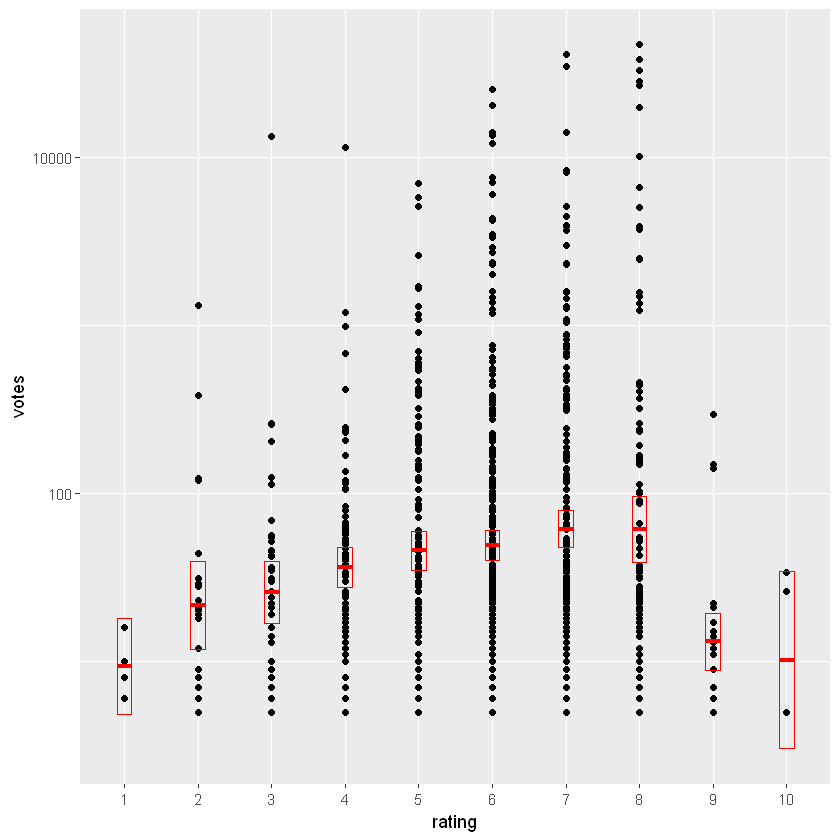

In [11]:
# Create movies_small
library(ggplot2movies)
set.seed(123)
movies_small <- movies[sample(nrow(movies), 1000), ]
movies_small$rating <- factor(round(movies_small$rating))

# Explore movies_small with str()
str(movies_small)

# Build a scatter plot with mean and 95% CI
ggplot(movies_small, aes(x = rating, y = votes)) +
  geom_point() +
  stat_summary(fun.data = "mean_cl_normal",
               geom = "crossbar",
               width = 0.2,
               col = "red") +
  scale_y_log10()

### Refresher (2)

The plot in the graphics device is a variation on an oft-seen ggplot2 example using the diamonds dataset (containing information on several variables of over 50,000 diamonds).

Recall that there are a variety of scale_ functions. Here, data are transformed or filtered first, after which the plot and associated statistics are computed. For example, scale_y_continuous(limits = c(100, 1000) will remove values outside that range.

Contrast this to coord_cartesian(), which computes the statistics before plotting. That means that the plot and summary statistics are performed on the raw data. That's why we say that coord_cartesian(c(100, 1000)) "zooms in" a plot. This was discussed in the chapter on coordinates in course 2.

Here we're going to expand on this and introduce scale_x_log10() and scale_y_log10() which perform log10 transformations, and coord_equal(), which sets an aspect ratio of 1 (coord_fixed() is also an option).

Your task is to reproduce the plot in the viewer. Before you do this, it might be a good idea to explore diamonds in the console if you are not familiar with it.
Instructions

  -  We are using three variables from the diamonds data set: carat, price, and color. Map them to the appropriate aesthetics as per the plot in the viewer.
  -  Add a geom_point() layer to make a scatter plot. Set the attributes alpha = 0.5, size = 0.5, shape = 16.
  -  Transform both axes to log10 scales using the aforementioned scale functions. The limits are, for x: c(0.1,10), for y: c(100,100000). To get nice formatting we're using the expression() function for the labels. Use expression(log[10](Carat)) for the x axis and expression(log[10](Price)) for the y axis.
  -  Use a coord_equal() function with no arguments, which will set the aspect ratio to 1.


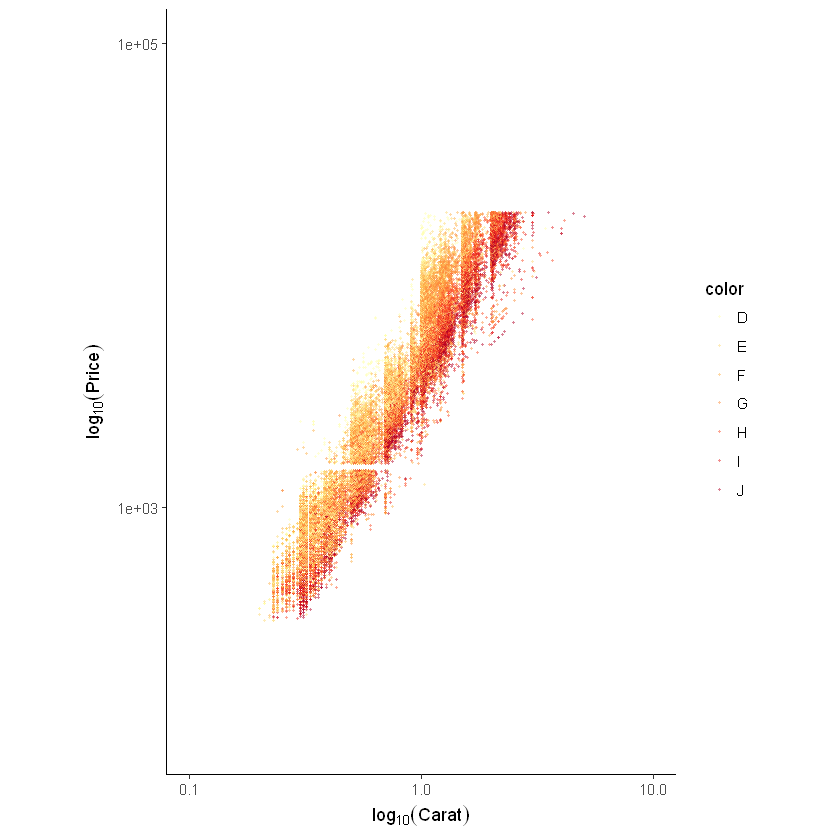

In [12]:
# Reproduce the plot
ggplot(diamonds, aes(x = carat, y = price, col = color)) +
  geom_point(alpha = 0.5, size = 0.5, shape = 16) +
  scale_x_log10(expression(log[10](Carat)), limits = c(0.1,10)) +
  scale_y_log10(expression(log[10](Price)), limits = c(100,100000)) +
  scale_color_brewer(palette = "YlOrRd") +
  coord_equal() +
  theme_classic()
  

This is a nice way of transforming data and then plotting it in one command. 

### Refresher (3)

The goal plot from the previous exercise is coded in your editor. Here you'll expand on this plot with stat_smooth() model instead of showing every data point.
Instructions

   - Remove the geom_point() layer.
   - Add a stat_smooth() layer and calculate an "lm" method (this will automatically happen for each level in the color variable).


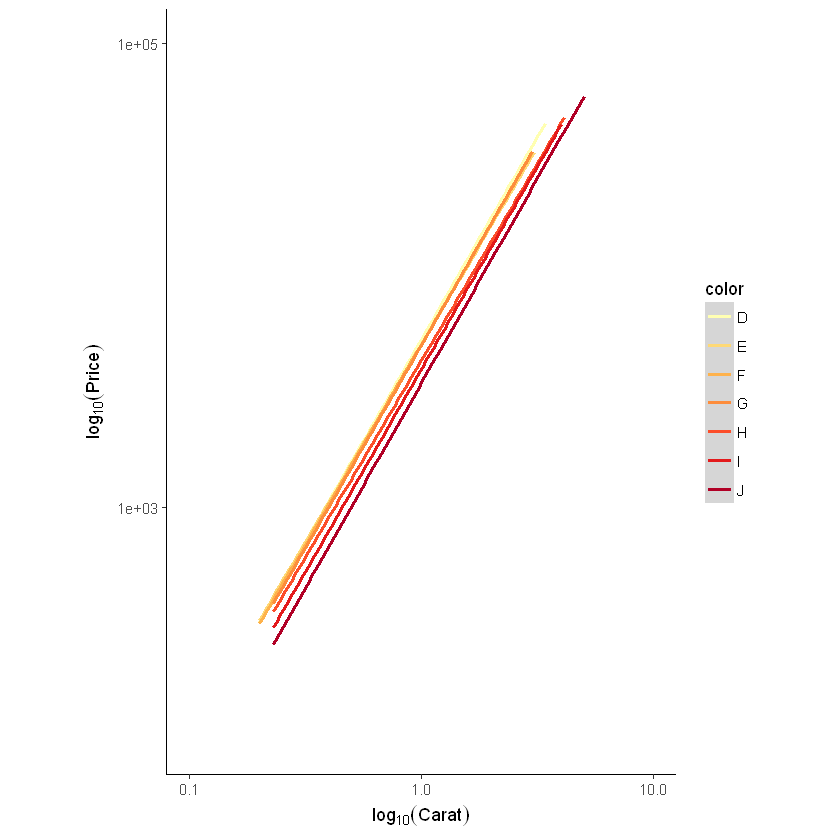

In [13]:
# Add smooth layer and facet the plot
ggplot(diamonds, aes(x = carat, y = price, col = color)) +
  stat_smooth(method="lm") +
  scale_x_log10(expression(log[10](Carat)), limits = c(0.1,10)) +
  scale_y_log10(expression(log[10](Price)), limits = c(100,100000)) +
  scale_color_brewer(palette = "YlOrRd") +
  coord_equal() +
  theme_classic()

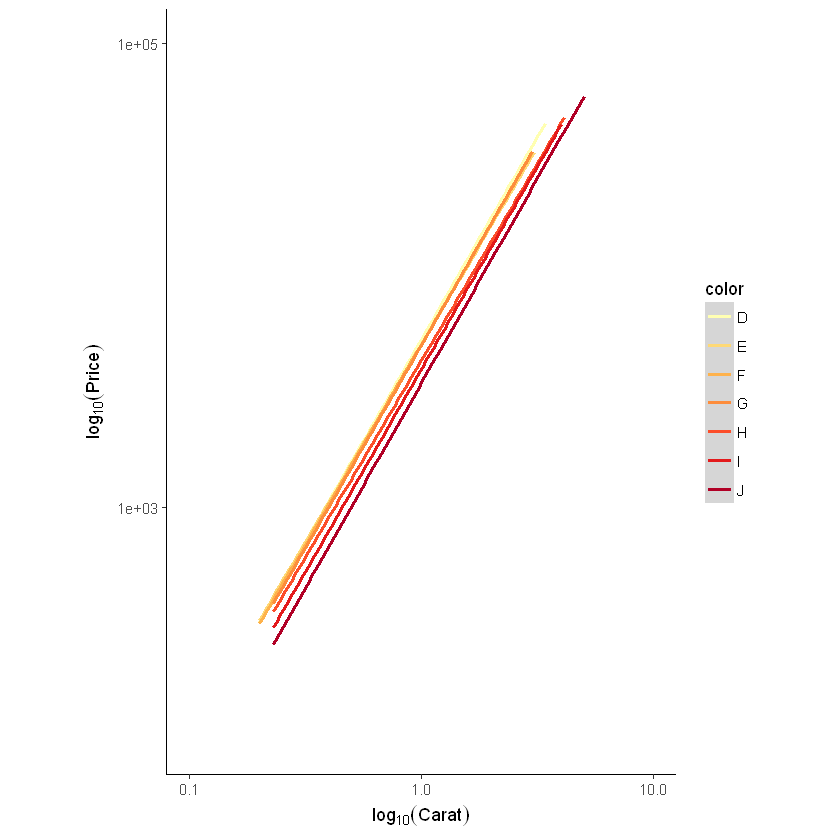

In [14]:
# Add smooth layer and facet the plot
ggplot(diamonds, aes(x = carat, y = price, col = color)) +
  geom_smooth(method="lm") +
  scale_x_log10(expression(log[10](Carat)), limits = c(0.1,10)) +
  scale_y_log10(expression(log[10](Price)), limits = c(100,100000)) +
  scale_color_brewer(palette = "YlOrRd") +
  coord_equal() +
  theme_classic()

## Box Plots - Video

### Transformations
100xp

In this exercise you'll return to the first plotting exercise and see how box plots compare to dot plots for representing high-density data.

Box plots are very useful, but they don't solve all your problems all the time, for example, when your data are heavily skewed, you will still need to transform it. You'll see that here, using the movies_small dataset, a subset of 10,000 observations of ggplot2movies::movies.
Instructions

   - Update the plotting object d by inserting a geom_boxplot() layer.
   - Make 3 plots:
   - d - the original plot without any transformations.
   - d + scale_y_log10() - the transformation happens before calculating the statistics.
   - d + coord_trans(y = "log10") - the transformation happens after calculating the statistics.


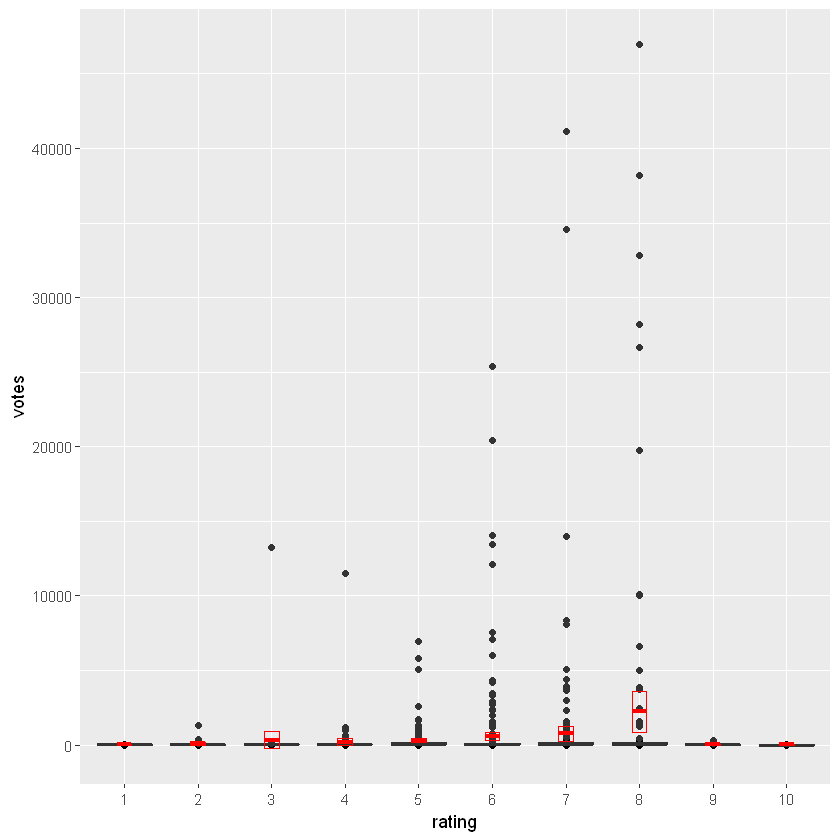

Warning message in trans$transform(out$range):
"NaNs produced"

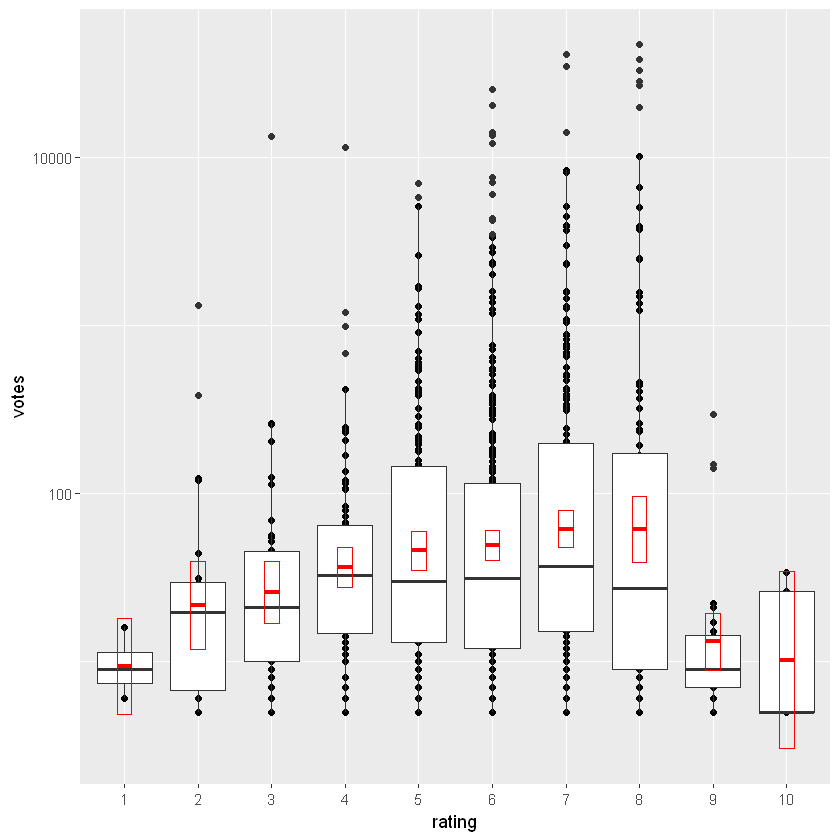

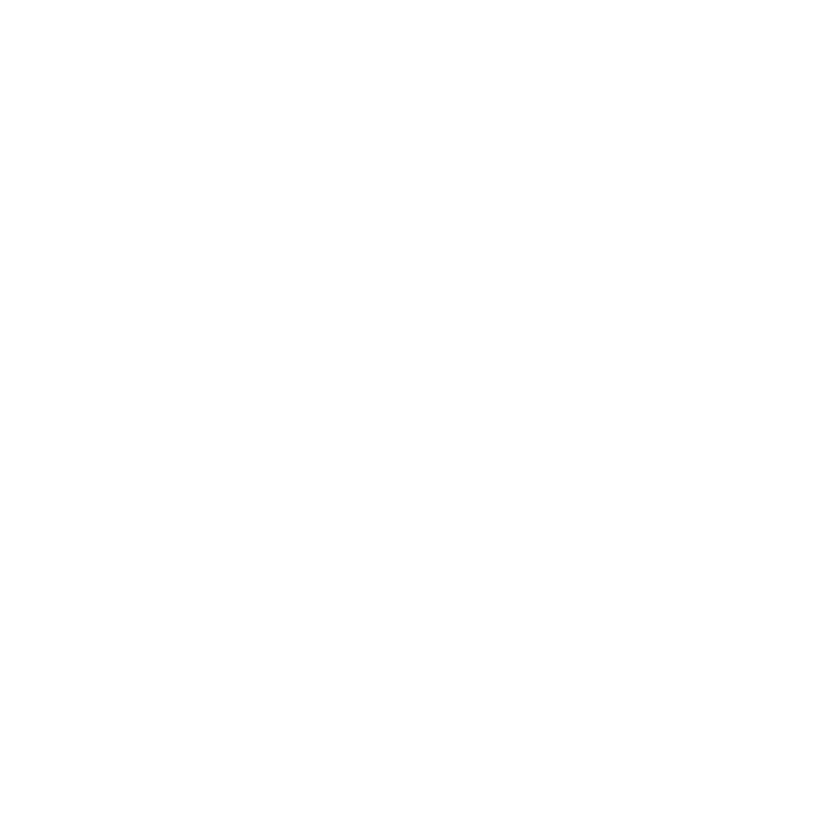

In [15]:
# movies_small is available

# Add a boxplot geom
d <- ggplot(movies_small, aes(x = rating, y = votes)) +
  geom_point() +
  geom_boxplot() +
  stat_summary(fun.data = "mean_cl_normal",
               geom = "crossbar",
               width = 0.2,
               col = "red")

# Untransformed plot
d

# Transform the scale
d + scale_y_log10()

# Transform the coordinates
d + coord_trans(y = "log10")

#3rd Plot is not getting plotted

In [ ]:
Notice how different the normal distribution estimation (red boxes) and boxplots (less prone to outliers) are. 

### Cut it up!
100xp

If you only have continuous variables, you can convert them into ordinal variables using any of the following functions:

    cut_interval(x, n) makes n groups from vector x with equal range.
    cut_number(x, n) makes n groups from vector x with (approximately) equal numbers of observations.
    cut_width(x, width) makes groups of width width from vector x.

This is useful when you want to summarize a complex scatter plot like the one shown in the viewer. By applying these functions to the carat variable and mapping that onto the group aesthetic, you can convert the scatter plot in the viewer into a series of box plots on the fly.
Instructions

  -  In all of the following cases x, the first argument in the functions, is carat. For example, cut_interval(carat, n = 10).
  -  In the first plot, use cut_interval with n = 10.
  -  In the second plot, use cut_number with n = 10.
  -  In the third plot, use cut_width with width = 0.25.


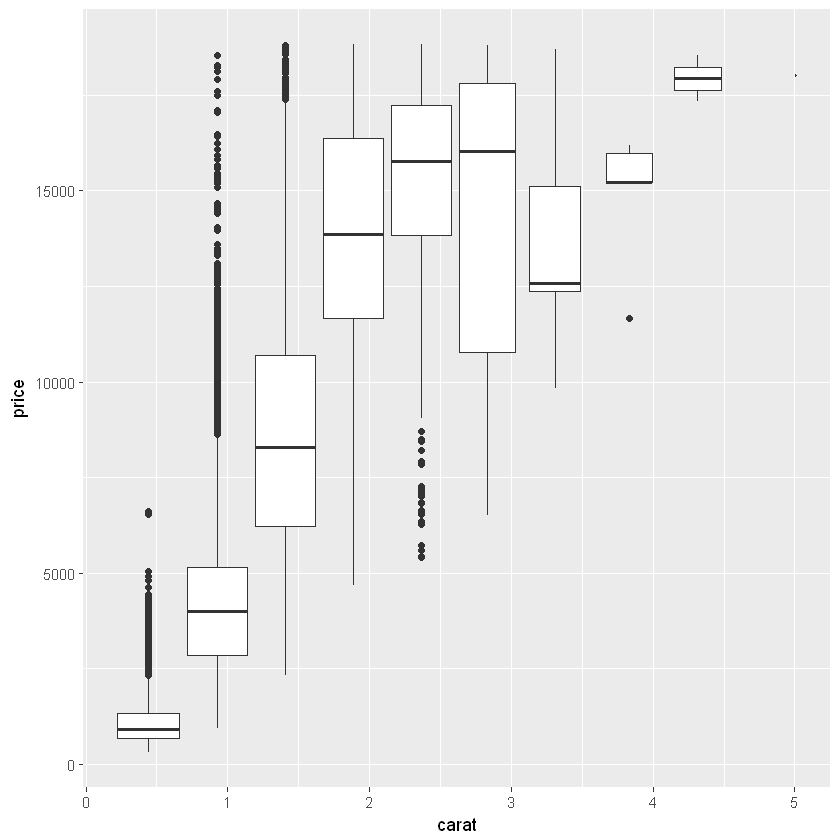

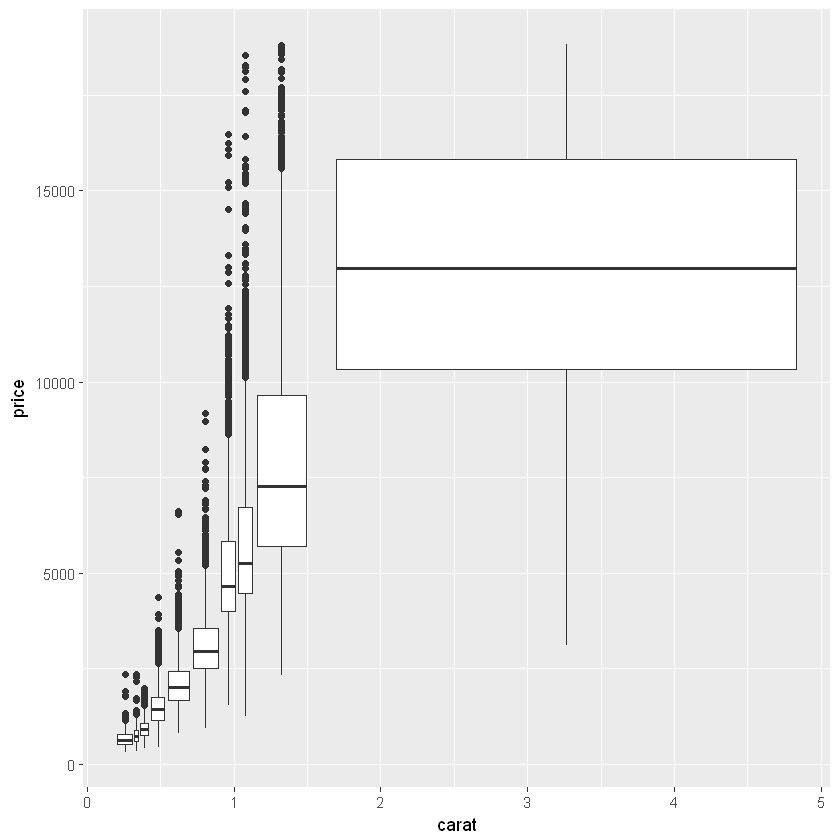

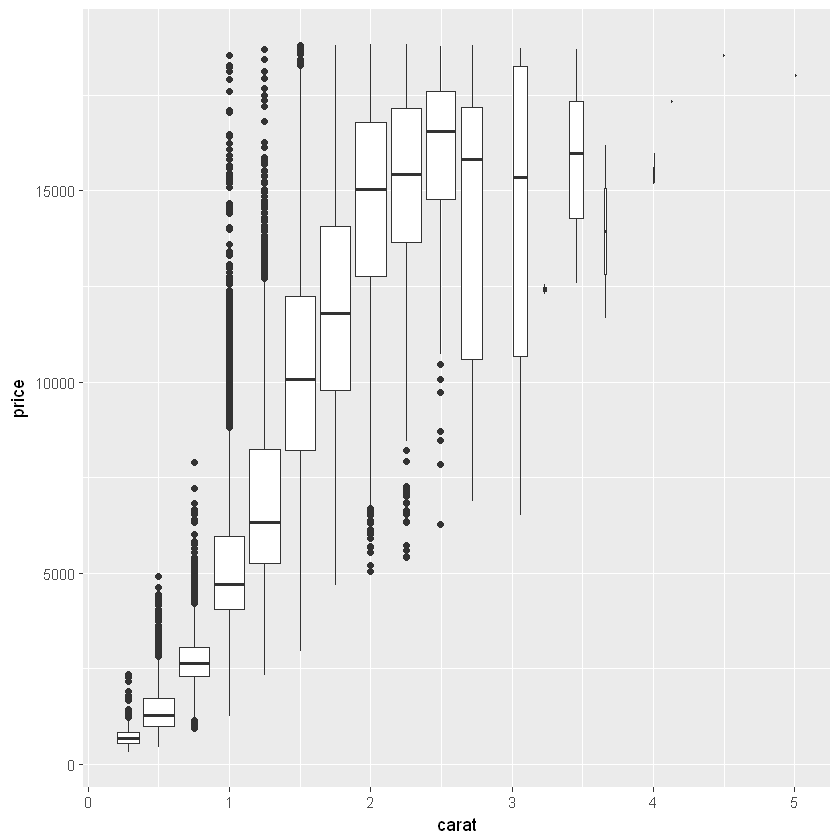

In [16]:
# Plot object p
p <- ggplot(diamonds, aes(x = carat, y = price))

# Use cut_interval
p + geom_boxplot(aes(group = cut_interval(carat, n = 10)))

# Use cut_number
p + geom_boxplot(aes(group = cut_number(carat, n = 10)))

# Use cut_width
p + geom_boxplot(aes(group = cut_width(carat, width = 0.25)))

Going from a continuous to a categorical variable reduces the amount of information, but sometimes that helps us understand the data. 

### Understanding quartiles

Be aware that there are many ways to calculate the IQR, short for inter-quartile range (that is Q3−Q1

). These are defined in the help pages for the quantile() function:

?quantile

To explore the differences in these types, a function called plot_quart() is available, that takes one argument: an integer specifying the number of values. Using rnorm() a vector of values will be generated and the quartiles will be calculated using nine different methods. Run the command in the console on the right using different values (for example 4, 10, 50, 100).

What can you say about the how the quartiles, and ergo the IQR, are calculated?
Possible Answers

  -  The IQR increases as the sample size increases.
  -  The IQR decreases as the sample size increases.
  -  The IQR becomes more consistent across methods as the sample size increases.
  -  The IQR becomes more inconsistent across methods as the sample size increases.
  -  The IQR is independent of the method used to calculate the quartiles.

Yes, the subtle difference between methods is not as pronounced when the sample size is large. In any case, you are likely to encounter spurious artefacts when drawing box plots with small sample sizes. 

## Density Plots - Video

### geom_density()

To make a straightforward density plot, add a geom_density() layer.

Before plotting, you will calculate the emperical density function, similar to how you can use the density() function in the stats package, available by default when you start R. The following default parameters are used (you can specify these arguments both in density() as well as geom_density()):

    bw = "nrd0", telling R which rule to use to choose an appropriate bandwidth.
    kernel = "gaussian", telling R to use the Gaussian kernel.

We've already prepared a data frame test_data for you, containing three columns: norm, bimodal and uniform. Each column represents 200 samples from a normal, bimodal and uniform distribution.
Instructions

   - Use density() to calculate the emperical PDF curve for test_data$norm. Save the result in an object d.
   - Create the variable mode: it is the value in d$x for which d$y is highest. Use which.max().
   - Finish the ggplot() command: add geom_rug() and geom_density(). The geom_vline() function to display the mode you just calculated is already provided.


In [ ]:
# test_data is available

# Calculating density: d
d = density(test_data$norm)

# Use which.max() to calculate mode
mode <- d$x[which.max(d$y)]

# Finish the ggplot call
ggplot(test_data, aes(x = norm)) +
  geom_rug() +
  geom_density() +
  geom_vline(xintercept = mode, col = "red")

 Recall that density plots can be combined in many ways, as we'll see in the next exercise.

### Combine density plots and histogram
100xp
Sometimes it is useful to compare a histogram with a density plot. However, the histogram's y-scale must first be converted to frequency instead of absolute count. After doing so, you can add an empirical PDF using geom_density() or a theoretical PDF using stat_function().

Can you finish the plot below by following the steps?

Instructions
 - Add a geom_histogram() layer; make sure to to set the y aesthetic to the internal ..density.. variable, overriding the default ..count...
 - Add a geom_density() layer and color it "red".
 - Add a normal curve using stat_function(). Do this by setting fun = dnorm and args = fun_args. fun_args is a list that was already specified, to override the default mean of 0 and standard deviation of 1. Finally, give this theoretical PDF a blue color.

In [ ]:
# test_data is available

# Arguments you'll need later on
fun_args <- list(mean = mean(test_data$norm), sd = sd(test_data$norm))

# Finish the ggplot
ggplot(test_data, aes(x = norm)) +
geom_histogram(aes(y=..density..)) +
geom_density(col="red") +
stat_function(fun=dnorm, args=fun_args, col="blue")


Don't go too crazy on overlapping plots, or things get too confusing.

### Adjusting density plots
100xp
There are three parameters that you may be tempted to adjust in a density plot:

bw - the smoothing bandwidth to be used, see ?density for details
adjust - adjustment of the bandwidth, see density for details
kernel - kernel used for density estimation, defined as
    
 - "g" = gaussian
 - "r" = rectangular
 - "t" = triangular
 - "e" = epanechnikov
 - "b" = biweight
 - "c" = cosine
 - "o" = optcosine
    
In this exercise you'll use a dataset containing only four points, small_data, so that you can see how these three arguments affect the shape of the density plot.

The vector get_bw contains the bandwidth that is used by default in geom_density(). p is a basic plotting object that you can start from.

Instructions
 - Create three plots:
 - Adding geom_density() to p.
 - Add geom_density() to p, and set the adjust argument to 0.25.
 - Add geom_density() to p, and explicitly set the bw argument to 0.25 * get_bw. Is the result the same?
 - Create two more plots:
 - Add geom_density() to p, and set kernel = "r"
 - Add geom_density() to p, and set kernel = "e".

In [ ]:
# small_data is available

# Get the bandwith
get_bw <- density(small_data$x)$bw

# Basic plotting object
p <- ggplot(small_data, aes(x = x)) +
  geom_rug() +
  coord_cartesian(ylim = c(0,0.5))

# Create three plots
p + geom_density()
p + geom_density(adjust=0.25)
p + geom_density(bw=0.25*get_bw)

# Create two plots
p + geom_density(kernel = "r")
p + geom_density(kernel = "e")

In [ ]:
Notice how the curve contained more features and their individual heights were increased as the bandwidth decreased.

## Multiple Groups/Variables - Video

Box plots with varying width
100xp
A drawback of showing a box plot per group, is that you don't have any indication of the sample size, nn, in each group, that went into making the plot. One way of dealing with this is to use a variable width for the box, which reflects differences in nn.

Can you add some good-looking box plots to the basic plot coded on the right?

Instructions
Add a geom_boxplot() layer and set varwidth to TRUE in the geom layer.
Add a mapping to the aesthetics layer, mapping color on the col aesthetic.
If you try out the plot you've coded up to now, you'll see a lot of overlapping box plots. Fix this by facetting the plot; use . ~ color.

In [ ]:
# Finish the plot
ggplot(diamonds, aes(x = cut, y = price)) +
geom_boxplot(varwidth=TRUE, aes(col=color)) +
facet_grid(.~color)

In [ ]:
This helps us see the differences in group size, but unfortunately there is no legend, so it's not a complete solution.

In [ ]:
Mulitple density plots
100xp
In this exercise you'll combine multiple density plots. Here, you'll combine just two distributions, a normal and a bimodal.

The first thing to remember is that you can consider values as two separate variables, like in the test_data data frame, or as a single continuous variable with their ID as a separate categorical variable, like in the test_data2 data frame. test_data2 is more convenient for combining and comparing multiple distributions.

Instructions
Add a geom_rug() and a geom_density() layer to the base data and aes layers for a plot of the normally distributed data. Note that to view the bimodal variable, you'd need a separate plot.
In the second plot, use the test_data2 data frame:
Map value onto x and dist onto both fill and col.
Inside geom_rug() and geom_density(), set alpha = 0.6.

In [ ]:
# test_data and test_data2 are available
str(test_data)
str(test_data2)

# Plot with test_data
ggplot(test_data, aes(x = norm)) +
  geom_rug() +
  geom_density()

# Plot two distributions with test_data2
ggplot(test_data2, aes(x = value, fill = dist, col = dist)) +
  geom_rug(alpha=0.6) +
  geom_density(alpha=0.6)

A small number of overlapping density plots are a fantastic way of comparing distinct distributions, for example, when descriptive statistics only (mean and sd) don't represent the data well enough.

### Multiple density plots (2)
100xp
When you looked at multiple box plots, you compared the total sleep time of various mammals, sorted according to their eating habits. One thing you noted is that for insectivores, box plots didn't really make sense, since there were only 5 observations to begin with. You decided that you could nonetheless use the width of a box plot to show the difference in sample size between the groups. Here, you'll see a similar thing with density plots.

A cleaned up version of the mammalian dataset is available as mammals.

Instructions
 - In the first plot, filter the mammals dataset to plot only the vore variable that equals "Insectivore".
 - Instead of filtering, add facet_wrap() to the second plot; using ~ vore and nrow = 2 to arrange the plots. Compare this to the first plot.
 - In the third plot, combines all the density plots together by mapping vore onto the fill aesthetic. The density plots are calculated separately for each group, which is derived from the fill aesthetic here.
 - Multiple density plots extend the range of all values to the total extent of the entire dataset. This may be a bit confusing, so in the fourth plot, in addition to mapping vore to fill, modify this by setting trim = TRUE inside geom_density(). However, be cautious. Since the distributions are cut off at the extreme ends, the area under the curve technically is not equal to one anymore.

In [ ]:
# Individual densities
ggplot(mammals[mammals$vore == "Insectivore", ], aes(x = sleep_total, fill = vore)) +
  geom_density(col = NA, alpha = 0.35) +
  scale_x_continuous(limits = c(0, 24)) +
  coord_cartesian(ylim = c(0, 0.3))

# With faceting
ggplot(mammals, aes(x = sleep_total, fill = vore)) +
  geom_density(col = NA, alpha = 0.35) +
  scale_x_continuous(limits = c(0, 24)) +
  coord_cartesian(ylim = c(0, 0.3)) +
  facet_wrap( ~ vore, nrow = 2)

# Note that by default, the x ranges fill the scale
ggplot(mammals, aes(x = sleep_total, fill = vore)) +
  geom_density(col = NA, alpha = 0.35) +
  scale_x_continuous(limits = c(0, 24)) +
  coord_cartesian(ylim = c(0, 0.3))

# Trim each density plot individually
ggplot(mammals, aes(x = sleep_total, fill = vore)) +
  geom_density(col = NA, alpha = 0.35, trim = TRUE) +
  scale_x_continuous(limits=c(0,24)) +
  coord_cartesian(ylim = c(0, 0.3))

In [ ]:
These simple tweeks make for great-looking statistical plots!

### Weighted density plots
100xp
When plotting a single variable, the density plots (and their bandwidths) are calculated separate for each variable (see the plot from the previous exercise, provided).

However, when you compare several variables (such as eating habits) it's useful to see the density of each subset in relation to the whole data set. This holds true for multiple density plots as well as for violin plots.

For this, we need to weight the density plots so that they're relative to each other. Each density plot is adjusted according to what proportion of the total data set each sub-group represents. We calculated this using the dplyr commands on lines 11-15.

The mammals data frame is available as before. After executing the commnads, it will have the variable n, which we'll use for weighting.

Instructions
 - To generate the weighted density plot, use aes() to map n onto the weight aesthetic inside geom_density().
 - Repeat for the violin plot.
 - Compare this adjusted plot to the original. Notice in particular how insectivores and omnivores change in appearance.

In [ ]:
# Unweighted density plot from before
ggplot(mammals, aes(x = sleep_total, fill = vore)) +
  geom_density(col = NA, alpha = 0.35) +
  scale_x_continuous(limits = c(0, 24)) +
  coord_cartesian(ylim = c(0, 0.3))

# Unweighted violin plot
ggplot(mammals, aes(x = vore, y = sleep_total, fill = vore)) +
  geom_violin()

# Calculate weighting measure
library(dplyr)
mammals2 <- mammals %>%
  group_by(vore) %>%
  mutate(n = n() / nrow(mammals)) -> mammals

# Weighted density plot
ggplot(mammals, aes(x = sleep_total, fill = vore)) +
  geom_density(aes(weight=n), col = NA, alpha = 0.35) +
  scale_x_continuous(limits = c(0, 24)) +
  coord_cartesian(ylim = c(0, 0.3))

# Weighted violin plot
ggplot(mammals, aes(x = vore, y = sleep_total, fill = vore)) +
  geom_violin(aes(weight = n), col = NA)

In [ ]:
2D density plots (1)
100xp
You can consider two orthogonal density plots in the form of a 2D density plot. Just like with a 1D density plot, you can adjust the bandwidth of both axes independently.

The data is stored in the faithful data frame, available in the datasets package. The object p contains the base definitions of a plot.

Instructions
1 - Add geom_density_2d() to p to create a 2D density plot with default settings.
2 - Use stat_density_2d() with arguments:
Define the bandwidths for the x and y axes by assigning a 2-element long vector (using c()) to the h argument: the bandwidth of the x axis is 5 and the y axis is 0.5.
Change the color of the lines to the density level they represent: specify aes(col = ..level..).

In [ ]:
# Base layers
p <- ggplot(faithful, aes(x = waiting, y = eruptions)) +
  scale_y_continuous(limits = c(1, 5.5), expand = c(0, 0)) +
  scale_x_continuous(limits = c(40, 100), expand = c(0, 0)) +
  coord_fixed(60 / 4.5)

# 1 - Use geom_density_2d()
p + geom_density_2d()

# 2 - Use stat_density_2d() with arguments
p + stat_density_2d(aes(col = ..level..), h = c(5, 0.5))

In [ ]:
 Think about the message in your scatter plots, sometimes clusters of high-density are more intersting than linear models.

In [ ]:
2D density plots (2)
100xp
Continuing with the density plots from the last exercise, here you'll explore the viridis package. This package contains multi-hue color palettes suitable for continuous variables.

The advantage of these scales is that instead of providing an even color gradient for a continuous scale, they highlight the highest values by using an uneven color gradient on purpose. The high values are lighter colors (yellow versus blue), so they stand out more.

A shaded 2D density plot showing the same data as the previous exercise has been provided for you. Up to you to upgrade it!

Instructions
Load the viridis package; it's already installed on DataCamp's servers.
Add the scale_fill_viridis() layer to the 2D density plot.

In [ ]:
# Load in the viridis package
library(viridis)

# Add viridis color scale
ggplot(faithful, aes(x = waiting, y = eruptions)) +
  scale_y_continuous(limits = c(1, 5.5), expand = c(0,0)) +
  scale_x_continuous(limits = c(40, 100), expand = c(0,0)) +
  coord_fixed(60/4.5) +
  stat_density_2d(geom = "tile", aes(fill = ..density..), h=c(5,.5), contour = FALSE) + 
  scale_fill_viridis()


# 2. Plots for specific data types (Part 1)

## Graphics of Large Data - Video

Pair plots and correlation matrices
100xp
On startup, R features two useful quick-and-dirty pairs plots functions. They both only take continuous variables.

You'll be working with the iris dataset and with mtcars_fact, a version of mtcars where categorical variables have been converted into actual factor columns.

Instructions
Use the pairs() function on iris[1:4] (only the continuous variables) to draw a SPLOM.
Use chart.Correlation() from the PerformanceAnalytics package to draw a correlation matrix, again of the first four columns of iris. Feel free to set graphical parameters using base package arguments such as pch, cex.labels and labels.
Use ggpairs() form the GGally package to create a pairs plot of mtcars_fact[1:3]. Notice that it is able to handle both continuous and categorical variables.

In [ ]:
# pairs
pairs(iris[1:4])

# chart.Correlation
library(PerformanceAnalytics)
chart.Correlation(iris[1:4])

# ggpairs
library(GGally)
ggpairs(mtcars_fact[1:3])

In [ ]:
SPLOM! These are some great-looking *S*catter *PLO*t *M*atrices.

In [ ]:
Create a correlation matrix in ggplot2
100xp
Instead of using an off-the-shelf correlation matrix function, you can of course create your own plot. Just for fun, in this exercise, you'll re-create the scatterplot you see on the right. The strength of the correlation is depicted by the size and color of the points and labels.

For starters, a correlation matrix can be calculated using, for example, cor(dataframe) (if all variables are numerical). Before you can use your data frame to create your own correlation matrix plot, you'll need to get it in the right format.

In the editor, you can see the definition of cor_list(), a function that re-formats the data frame x. Here, L is used to add the points to the lower triangle of the matrix, and M is used to add the numerical values as text to the upper triangle of the matrix. With reshape2::melt(), the correlation matrices L and M are each converted into a three-column data frame: the x and y axes of the correlation matrix make up the first two columns and the corresponding correlation coefficient makes up the third column. These become the new variables "points" and "labels", which can be mapped onto the size aesthetic for the points in the lower triangle and onto the label aesthetic for the text in the upper triangle, respectively. Their values will be the same, but their positions on the plot will be symmetrical about the diagonal! Merging L and M, you have everything you need.

If you're not familiar with reshape2 - don't worry, the only reason we use that instead of tidyr is that reshape2::melt() can handle a matrix, whereas tidyr::gather() requires a data frame. At this point you just need to understand how to use the output from cor_list().

You'll first use dplyr to execute this function on the continuous variables in the iris data frame (the first four columns), but separately for each species. Please refer to the course on dplyr if you are not familiar with these functions.

Next, you'll actually plot the resulting data frame with ggplot2 functions.

Instructions
Update the dplyr command: insert a group_by() call so that correlations are calculated per Species.
Finish the ggplot() command:
In the aesthetics layer, map Var1 onto x and Var2 onto y.
Inside geom_point(), map points onto col and abs(points) onto size. We use abs() to get the absolute value here since correlations can be positive or negative, but size can only be positive. Don't set
Similarly, inside geom_text(), define both the col and size aesthetics in the same way, but this time use the labels variable instead of points.
Add a facet_grid() layer to facet according to Species.

In [ ]:
library(ggplot2)
library(reshape2)

cor_list <- function(x) {
  L <- M <- cor(x)
  
  M[lower.tri(M, diag = TRUE)] <- NA
  M <- melt(M)
  names(M)[3] <- "points"
  
  L[upper.tri(L, diag = TRUE)] <- NA
  L <- melt(L)
  names(L)[3] <- "labels"
  
  merge(M, L)
}

# Calculate xx with cor_list
library(dplyr)
xx <- iris %>%
  group_by(Species) %>%
  do(cor_list(.[1:4]))  

# Finish the plot
ggplot(xx, aes(x = Var1, y = Var2)) +
  geom_point(aes(col = points, size = abs(points)), shape = 16) +
  geom_text(aes(col = labels, size = abs(labels), label = round(labels, 2))) +
  scale_size(range = c(0, 6)) +
  scale_color_gradient2("r", limits = c(-1, 1)) +
  scale_y_discrete("", limits = rev(levels(xx$Var1))) +
  scale_x_discrete("") +
  guides(size = FALSE) +
  geom_abline(slope = -1, intercept = nlevels(xx$Var1) + 1) +
  coord_fixed() +
  facet_grid(. ~ Species) +
  theme(axis.text.y = element_text(angle = 45, hjust = 1),
        axis.text.x = element_text(angle = 45, hjust = 1),
        strip.background = element_blank())

## Ternary Plots - Video

Proportional/stacked bar plots
100xp
Before you head over to ternary plots, let's try to make a classical proportional/stacked bar plot of a subset of the data. We'll use a stacked bar plot and the coord_flip() function to flips the x and y axes.

The data frame for the African Soil Profiles Database is available in your workspace as africa and can be found in the GSIF package. It contains three columns: Sand, Silt and Clay. A smaller version, containing only 50 observations is stored in africa_sample.

In the first course we mentioned that in the data layer, the structure of the data should reflect how you wish to plot it. For a ternary plot, you need to have three separate variables, for example, Sand, Silt and Clay in africa. However, for a proportional/stacked bar plot, you just need two. The type should be defined as three levels within a single factor variable. That is, you want tidy data.

It's also useful to maintain the site IDs as a variable within the data frame, currently, they are stored at row names, which is poor style and not useful.

Instructions
Explore the structure of the africa and africa_sample datasets with str().
Add a column ID to africa_sample; use row.names(africa_sample) to populate it.
If you are not familiar with gather(), please review the course on tidyr. africa_sample_tidy contains tidy data arranged as a long data frame. Execute head(africa_sample_tidy) to view the first few rows so that you know the variable names and contents. Contrast africa_sample_tidy with africa_sample.
Finish the ggplot() command: define the data and aesthetics layer to create a stacked bar plot showing the soil composition levels of each observation (ID). Notice that geom_col() is used, since the values in the data frame are exactly where you want the bars to be drawn.

In [ ]:
# Explore africa
str(africa)
str(africa_sample)

# Add an ID column from the row.names
africa_sample$ID <- row.names(africa_sample)

# Gather africa_sample
library(tidyr)
africa_sample_tidy <- gather(africa_sample, key, value, -ID)
head(africa_sample_tidy)

# Finish the ggplot command
ggplot(africa_sample_tidy, aes(x = factor(ID), y = value, fill = key)) +
  geom_col() +
  coord_flip()

In [ ]:
 Remember stacked bar charts as an alternative to pie charts?

In [ ]:
Producing ternary plots
100xp
Ok, let's move onto ternary plots. For this you'll use the ggtern package, which provides the ggtern() function.

In contrast to what you just saw in africa_small_tidy, the three soil properties, Sand, Silt and Clay, are not going to be located in a single variable. The distinction between wide and tidy format data was discussed in the first course and here you'll see it in action. Sometimes you need to rearrange your data for the desired plot type.

Here, you'll use the complete dataset, africa, containing three separate variables for the measures of interest: that format is perfect for a ternary plot.

Instructions
Load the ggtern library; it's already installed on DataCamp's servers.
Create a ternary plot of the africa data:
Use ggtern() to create a ternary plot as you would use ggplot(), assigning Sand, Silt and Clay to the x, y, and z aesthetics, respectively.
Add a point geom. For this geom, set shape = 16 and alpha = 0.2.

In [ ]:
# Load ggtern
library(ggtern)

# Build ternary plot
ggtern(africa, aes(x = Sand, y = Silt, z = Clay)) +
  geom_point(shape=16, alpha=0.2)

In [ ]:
Adjusting ternary plots
100xp
Ternary plots have been around for a while in R; you could achieve the same thing with the vcd package authored by Michael Friendly. If you just need a quick and dirty ternary plot, that may suit you just fine. However, since ggtern is built on ggplot2, you can take advantage of all the tools available therein.

ggtern is authored by Nicholas Hamilton, more information can be found on his package website: www.ggtern.com.

The plot from the previous exercise is available twice. Can you adapt it in different ways to make different ternary density plots?

Instructions
For the first plot, make a contour plot:
Use geom_density_tern() instead of geom_point().
For the second plot, make a filled density plot:
Use stat_density_tern() instead of geom_point() and set geom = "polygon".
Inside stat_density_tern(), update some aesthetics: map the internal ..level.. variable onto both fill and alpha.
Suppress the legend using a guides(fill = FALSE) layer.

In [ ]:
# ggtern and ggplot2 are loaded
# Original plot:
ggtern(africa, aes(x = Sand, y = Silt, z = Clay)) +
  geom_point(shape = 16, alpha = 0.2)

# Plot 1
ggtern(africa, aes(x = Sand, y = Silt, z = Clay)) +
  geom_density_tern()

# Plot 2
ggtern(africa, aes(x = Sand, y = Silt, z = Clay)) +
  stat_density_tern(geom = "polygon", aes(fill = ..level.., alpha = ..level..)) +
  guides(fill = FALSE)

## Network Plots - Video

In [ ]:
Build the network (1)
100xp
Network data may be stored in a variety of ways.

For this example, you'll use an undirected network of romantic relationships in the TV show Mad Men: geomnet::madmen.

Instructions
Load the geomnet package and examine the structure of the madmen dataset. Notice that it is a list of two data frames called edges and vertices. This is enough information to build the network.
Use merge() to merge the madmen$edges and madmen$vertices data frames. You can connect observations: by.x is the Name1 variable in the edges data frame, which matches by.y, the label variable in the vertices data frame. Store the result inside a new data frame mmnet.
Examine the structure of your new mmnet data frame.

In [3]:
# Load geomnet & examine structure of madmen
library(geomnet)
str(madmen)

# Merge edges and vertices
mmnet <- merge(madmen$edges, madmen$vertices,
               by.x = "Name1", by.y = "label",
               all = TRUE)

# Examine structure of mmnet
str(mmnet)

List of 2
 $ edges   :'data.frame':	39 obs. of  2 variables:
  ..$ Name1: Factor w/ 9 levels "Betty Draper",..: 1 1 2 2 2 2 2 2 2 2 ...
  ..$ Name2: Factor w/ 39 levels "Abe Drexler",..: 15 31 2 4 5 6 8 9 11 21 ...
 $ vertices:'data.frame':	45 obs. of  2 variables:
  ..$ label : Factor w/ 45 levels "Abe Drexler",..: 5 9 16 23 26 32 33 38 39 17 ...
  ..$ Gender: Factor w/ 2 levels "female","male": 1 2 2 1 2 1 2 2 2 2 ...
'data.frame':	75 obs. of  3 variables:
 $ Name1 : Factor w/ 45 levels "Betty Draper",..: 1 1 2 2 2 2 2 2 2 2 ...
 $ Name2 : Factor w/ 39 levels "Abe Drexler",..: 15 31 2 4 5 6 8 9 11 21 ...
 $ Gender: Factor w/ 2 levels "female","male": 1 1 2 2 2 2 2 2 2 2 ...


In [ ]:
Build the network (2)
100xp
Now that your data is in the correct format, you can build the actual network plot.

You'll use the geom_net() function, a ggplot layer that's in the geomnet package. The ggnetwork package is a popular alternative, but we will not discuss that here.

Can you finish the ggplot() command?

Instructions
Use the mmnet as the data layer
geomnet provides new aesthetics: from_id and to_id. Map Name1 and Name2 (that were originally in the edges data frame) onto these aesthetics, in this order.
Add a geom_net() geom layer to visualise the results, and specify several things:
Inside an additional aes() function, map Gender onto col.
Set size = 6, linewidth = 1, labelon = TRUE, fontsize = 3, and labelcolour = "black".

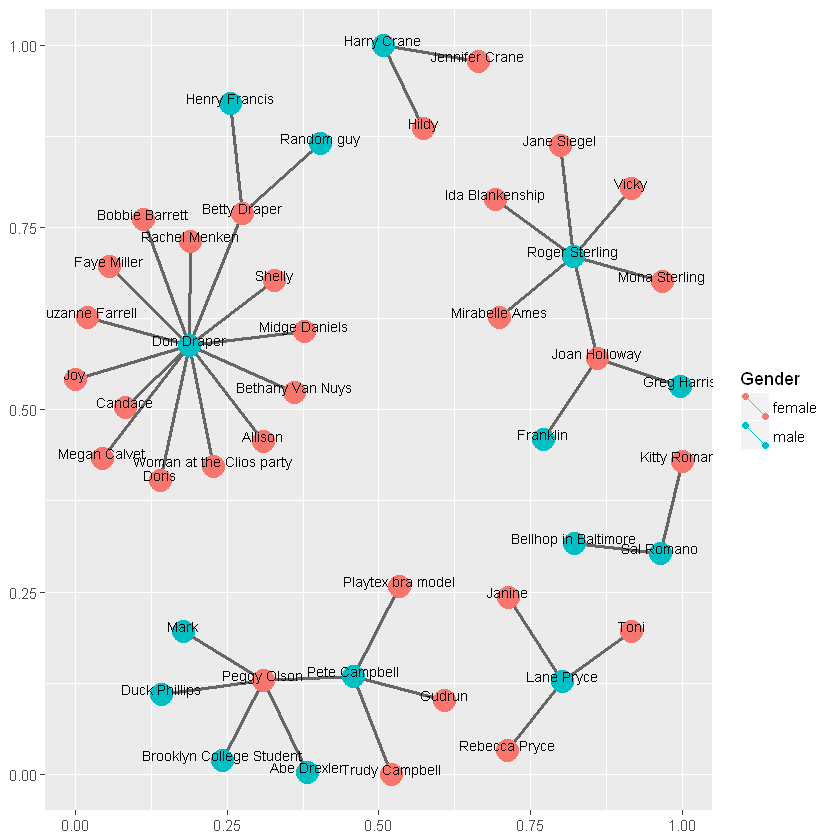

In [4]:
# geomnet is pre-loaded

# Merge edges and vertices
mmnet <- merge(madmen$edges, madmen$vertices,
               by.x = "Name1", by.y = "label",
               all = TRUE)

# Finish the ggplot command
ggplot(data = mmnet, aes(from_id = Name1, to_id = Name2)) +
  geom_net(aes(col=Gender), size = 6, linewidth = 1, labelon = TRUE, fontsize = 3, labelcolour = "black")

In [ ]:
Adjusting the network
100xp
Let's clean up the network a bit. As you can see, since this is in the ggplot2 framework, you can manually adjust the scales like you have always done.

Here you're going to use another trick to remove all theme elements and make a clean network plot.

Instructions
Make the edged directed by setting directed = TRUE inside geom_net.
Add a scale_color_manual() call and therein, set values = c("#FF69B4", "#0099ff").
Add an xlim() layer and set it to c(-0.05, 1.05).
Add a ggmap::theme_nothing() layer. This will remove (almost) all theme elements. Make sure to keep the legend by setting legend = TRUE.
Add a theme() layer and set the legend.key argument to element_blank().

In [5]:
library(ggmap)

ERROR: Error in library(ggmap): there is no package called 'ggmap'


Warning message:
"`panel.margin` is deprecated. Please use `panel.spacing` property instead"

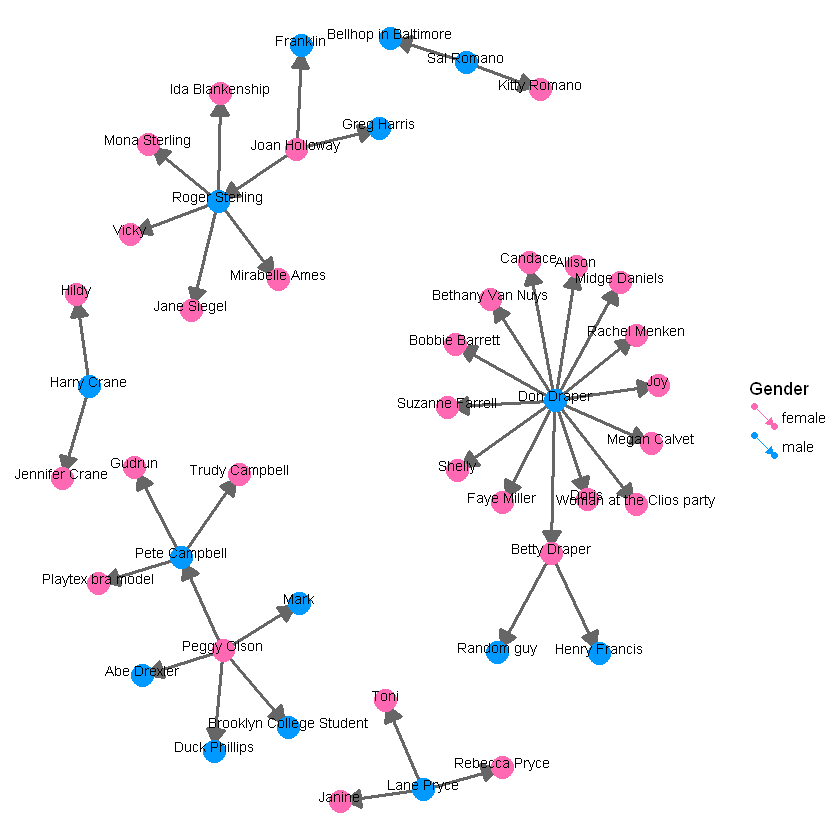

In [8]:
# geomnet is pre-loaded

# Merge edges and vertices
mmnet <- merge(madmen$edges, madmen$vertices,
               by.x = "Name1", by.y = "label",
               all = TRUE)

# Tweak the network plot
ggplot(data = mmnet, aes(from_id = Name1, to_id = Name2)) +
  geom_net(aes(col = Gender),
           size = 6,
           linewidth = 1,
           labelon = TRUE,
           fontsize = 3,
           labelcolour = "black",
           directed = TRUE) +
  scale_color_manual(values = c("#FF69B4", "#0099ff")) + 
  xlim(c(-0.05, 1.05)) +
  ggmap::theme_nothing(legend = TRUE) +
  theme(legend.key = element_blank())

In [ ]:
Altohough blue and pink are typical colours from male and female, feel free to break gender stereotypes!

## Diagnostic Plots - Video

In [ ]:
Autoplot on linear models
100xp
R has several plotting methods for specific objects. For example using plot() on the results of an lm() call results in four plots that give you insight into how well the assigned model fits the data.

The ggfortify package is an all-purpose plot converter between base graphics and ggplot2 grid graphics.

You'll explore exactly what we mean by graphics and grid in chapter 4. For now, just know that if you want to use the automatic output features in the context of ggplot2, they must first be converted to a ggplot object via ggfortify. This can be important at the superficial level, for consistency in appearance, but also at a deeper level, for later combining several plots in a single graphics device.

Instructions
Create a linear model, called res, defined by Volume ~ Girth, variables found in the trees data frame.
Use plot() to visualize res.
Load the ggfortify package and use autoplot() on res, and ncol = 2 to convert this to a ggplot2 plot.

In [ ]:
# Create linear model: res
res <- lm(Volume~Girth, data = trees)

# Plot res
plot(res)

# Import ggfortify and use autoplot()
library(ggfortify)
autoplot(res, ncol=2)


Amazing Autoplot! The lm plots are incredibly informative diagnostic plots, that you can now manipulate within a ggplot2 framework.

In [ ]:
ggfortify - time series
100xp
Time series objects (class mts or ts) also have their own methods for plot(). ggfortify can also take advantage of this functionality.

In the workspace, you'll find the variable Canada (it comes from the vars package): an mts class object with four series: prod is a measure of labour productivity, e is employment, U is the unemployment rate, and rw the real wage. They are each plotted as separate series by default.

Instructions
Inspect the structure of Canada; can you figure out which class the object is?
Call plot() on Canada
Call autoplot() on Canada and compare the plot with the previous one.

In [ ]:
# ggfortify and Canada are available

# Inspect structure of Canada
str(Canada)

# Call plot() on Canada
plot(Canada)

# Call autoplot() on Canada
autoplot(Canada)


In [ ]:
Master mts! The time-series and multiple time-series class objets are flexible and common formats.

In [ ]:
### Distance matrices and Multi-Dimensional Scaling (MDS)
100xp
As you can probably imagine, distance matrices (class dist) contain the measured distance between all pair-wise combinations of many points. For example, the eurodist dataset contains the distances between major European cities. dist objects lend themselves well to autoplot().

The cmdscale() function from the stats package performs Classical Multi-Dimensional Scaling and returns point coodinates as a matrix. Although autoplot() will work on this object, it will produce a heatmap, and not a scatter plot. However, if either eig = TRUE, add = TRUE or x.ret = TRUE is specified, cmdscale() will return a list instead of matrix. In these cases, the list method for autoplot() in the ggfortify package can deal with the output. Specifics on multi-dimensional scaling is beyond the scope of this course, however details on the method and these arguments can be found in the help pages ?cmdscale.

Instructions
Call autoplot() on the eurodist distance matrix.
It's a ggplot2 object, so use coord_fixed() to set a 1:1 aspect ratio.
Call autoplot() on cmdscale(eurodist, eig = TRUE). Some arguments for autoplot() have been specified for you.:
label = TRUE, label.size = 3 labels each point, and
size = 0 removes the dots.

In [ ]:
# ggfortify and eurodist are available
# Autoplot + ggplot2 tweaking
autoplot(eurodist) + 
  coord_fixed()

# Autoplot of MDS
autoplot(cmdscale(eurodist, eig = TRUE), 
         label = TRUE, 
         label.size = 3, 
         size = 0)

In [ ]:
 It's so easy to apply everything we learned from the first two classes to special types of analysis.

Plotting K-means clustering
100xp
ggfortify also supports stats::kmeans class objects. You must explicitly pass the original data to the autoplot function via the data argument, since kmeans objects don't contain the original data. The result will be automatically colored according to cluster.

Here, you'll use the iris dataset and just look at K-means clustering, although this works on many clustering methods, including cluster::clara(), cluster::fanny(), cluster::pam() and stats::prcomp(). Unfortunately a discussion of these clustering methods is beyond the scope of this course.

Instructions
Use kmeans(), a function in the stats package, to perform clustering on iris[-5] with 3 groups. Store the result as iris_k (You odn't need to specify stats::).
Use iris_k in autoplot(), and set data = iris. In addition, set frame = TRUE to draw a polygon around each cluster.
The previous plot colored the points according to cluster. Copy and paste the command, and add shape = 'Species' to map Species onto the shape aesthetic (you don't need aes() here). This is pretty interesting, since our points are coloured by cluster, and we can see each species (and mis-matches) by shape.

In [9]:
# Perform clustering
iris_k <- kmeans(iris[-5], 3)

# Autoplot: color according to cluster
autoplot(iris_k, data = iris, frame = TRUE)

# Autoplot: above, plus shape according to species
autoplot(iris_k, data = iris, frame = TRUE,shape = 'Species')

ERROR: Error: Objects of type kmeans not supported by autoplot.


In [ ]:
 The different coloring gives an entirely different picture! It seems like your clustering wasn't that successful…

# 3. Plots for specific data types (Part 2)

## Choropleths - Video

In [ ]:
# maps, ggplot2, and ggmap are pre-loaded
# Use map_data() to create usa and inspect
usa <- map_data("usa")
str(usa)

# Build the map
ggplot(usa, aes(x = long, y = lat, group = group)) +
  geom_polygon() +
  coord_map() +
  theme_nothing()

In [ ]:
Note that if you're familiar with coordinate reference systems (CRS) you can also define your own in the coord_map() layer.

In [ ]:
Working with maps from the maps package: adding points
100xp
Now that you have some polygons, there are a number of things you can do. Here you'll add some data points, namely the location of US cities with a population over 100,000 (population estimation as of 2015). Since you're only looking at the continental US, Honolulu, Hawaii and Anchorage, Alaska are not included.

The data is stored in the cities data frame. You'll begin by drawing points of varying sizes, relative to the estimated population. An alternative is to use color instead of size, and in this case a nice trick is to order the data frame, so that the largest cities are drawn on top of the smaller cities. This is so that they will stand out against the background, which is particularly effective when using the viridis color palette.

Instructions
Finish the first plot:
In the geom_point() layer: set data = cities, and inside aes(), map State onto group and Pop_est onto size. These are both variables in cities. The x and y aesthetics will be inherited from the original aes() definitions. Further customisations on geom_point() have been provided.
The code to create an arranged version of cities has already been provided.
Copy-paste the code for the first plot, and adapt it:
In the geom_polygon() layer, set fill equal to "grey90".
Use cities_arr instead of cities inside geom_point().
Map Pop_est onto col instead of onto size. Make sure to remove the col = "red" part! Also, set size = 2.
Add scale_color_viridis() to the end of the ggplot()

In [ ]:
# usa, cities, and all required packages are available

# Finish plot 1
ggplot(usa, aes(x = long, y = lat, group = group)) +
  geom_polygon() +
  geom_point(data = cities, aes(group = State, size = Pop_est),
             col = "red", shape = 16, alpha = 0.6) +
  coord_map() +
  theme_map()

# Arrange cities
library(dplyr)
cities_arr <- arrange(cities, Pop_est)

# Copy-paste plot 1 and adapt
ggplot(usa, aes(x = long, y = lat, group = group)) +
  geom_polygon(fill="grey90") +
  geom_point(data = cities_arr, aes(group = State, col = Pop_est),
             size=2, shape = 16, alpha = 0.6) +
  coord_map() +
  theme_map() +
  scale_color_viridis()




New York appears as a bright yellow anomly in a sea of darker points. If you didn't set the order of the data, this point would have been obscured. You can also see LA, Chicago and Houston as lighter blue points.

In [ ]:
State choropleth
100xp
To make a choropleth (a map in which areas are shaded according to some measure) you'll need information on state boundaries, which you can find in the maps package. Once the map information is converted into a data frame, you can merge this with another data frame containing some quantitative information, like the estimated population, and use that variable in our aesthetic mappings.

Instructions
Call map_data() on "state" and to create the state data frame.
Create a first plot, from scratch:
Use the state data
Map lat, long, and group onto the appropriate aesthetics, as before. In addition, map region onto the fill aesthetic.
Add the geom_polygon() layer, and set col = "white".
Add coord_map() to better shape the map.
Add theme_nothing() to remove the legend, because it's not that informative.
To make the plot more meaningful, execute the merge() command to bring together state and pop, which contains the Pop_est variable - the 2015 population estimate for each US state. The result is stored as state2.
Copy-paste the first plot, and adapt it:
Use state2 instead of state.
Instead of assigning region to fill, use Pop_est.
Use theme_map instead of theme_nothing, so the legend is displayed.

In [ ]:
# pop and all required packages are available

# Use map_data() to create state
state <- map_data("state")

# Map of states
ggplot(state, aes(x = long, y = lat, fill = region, group = group)) +
  geom_polygon(col = "white") +
  coord_map() +
  theme_nothing()

# Merge state and pop: state2
state2 <- merge(state, pop)

# Map of states with populations
ggplot(state2, aes(x = long, y = lat, fill = Pop_est, group = group)) +
  geom_polygon(col = "white") +
  coord_map() +
  theme_map()


In [ ]:
Map from shapefiles
100xp
Although the built-in maps from the maps package are very convenient, using shapefiles is a more flexible way of accessing geographic and political boundaries.

Shapefiles can be used to describe points, polylines or polygons - here you'll focus on polygons for drawing maps.

A single shapefile actually consists of several files, each describing a specific aspect of the overall geometry. The three core file types are:

.shp: the shape, the feature geometry itself.
.shx: the shape index, a positional index.
.dbf: the attribute, attributes for each shape arranged in columns.
The prefix name of these files must be consistent and they must be kept in the same directory. The files you'll use are for Germany, and all begin with DEU. The suffix specifies the level of organization:

DEU_adm0 is the administrative (political) boundaries of the entire country (like the usa object before)
DEU_adm1 is the administrative boundaries for each of the 16 states (like the state object before)
Let's start by importing the shapefile and creating a map of Germany. All shapefiles you need are in the shapes folder of your working directory; you can check it out with dir(). In the next exercise, you'll take things one step further.

NOTE: Building these maps is computationally heavy, so it can take some time before you see your results.

Instructions
Use readOGR() to read in the shapefiles and store the data as germany. It takes two arguments:
dsn, data source name, the folder of the shapefiles. Should be "shapes".
layer, the level you are interested in. You want state information, so "DEU_adm1".
Convert the shape object germany into a data frame with the fortify() function. Assign the output to the object bundes (shorthand for Bundesland the german word for state).
Create a map of bundes:
Map lat, long and group on the appropriate aesthetics like before.
Add a polygon geom, and use fill = "blue" and col = "white".
Finally, add coord_map() and theme_nothing() to make things look nicer.

In [ ]:
# All required packages are available
# Import shape information: germany
germany <- readOGR(dsn = "shapes", layer = "DEU_adm1")

# fortify germany: bundes
bundes <- fortify(germany)

# Plot map of germany
ggplot(bundes, aes(x = long, y = lat, group = group)) +
    geom_polygon(fill="blue", col="white") +
    coord_map() +
    theme_nothing()
    

In [ ]:
 You can also imagine that it would be possible to draw single layers, like only the shape for Berlin.

In [ ]:
Choropleth from shapefiles
100xp
Now that you have the shape data a neatly formatted data frame called bundes, you can easily merge it with state-level data. germany, bundes and unemp (a data frame on unemployment in Germany) is available in your workspace. Can you do some data munging and then make a fancy choropleth?

If you check out bundes, you'll see that you've lost the state names, so merging isn't going to work out of box. That's why we've added two lines of code in the editor, to re-add state names.

NOTE: Building these choropleths is computationally heavy, so it can take some time before you see your results

Instructions
Merge together bundes and unemp and store the result as bundes_unemp.
Adapt the first ggplot, coming from the previous exercise:
Use bundes_unemp instead of bundes
Add an aesthetic mapping: map unemployment onto fill
Remove the fill and col settings from geom_polygon()
Use theme_map() instead of theme_nothing()

In [ ]:
# germany, bundes and unemp are available

# re-add state names to bundes
bundes$state <- factor(as.numeric(bundes$id))
levels(bundes$state) <- germany$NAME_1

# Merge bundes and unemp: bundes_unemp
bundes_unemp = merge(bundes, unemp)

# Update the ggplot call
ggplot(bundes_unemp, aes(x = long, y = lat, group = group, fill=unemployment)) +
  geom_polygon(fill = "blue", col = "white") +
  coord_map() +
  theme_map()

At the outset this looks fine, but if you count the states, you'll see you only have 14! The reason is that Berlin and Bremen are city-states located within the shape definitions of other states. You can solve this by reording the data (like you did before), or by adding two specific layers, for example, geom_polygon(data = subset(bundes_unemp, id == "Berlin")).

## Cartographic Maps - Video

### Different templates
100xp
ggmap provides the get_map() function to access google maps. Only one argument, location is essential. Other than that, there are a bunch of arguments you can set, such as zoom, maptype (how do you want your map to look?) and source (where to get your data from?).

There are several default map types you can use for cartographic maps. For example, "toner" is a black and white theme, but you can also ask for pure satellite images or a hybrid image, showing the major roads and cities.

Instructions
 - Load the ggmap package.
 - Use get_map() to access the map for "London, England". By default, it will ask Google about some data. Set the zoom = 13 and store the result as london_map_13.
 - Instead of using ggplot() like you're used to, use ggmap(). Simply pass the object you've created in the previous step.
 - Experiment with the arguments of get_map: try different arguments of source and maptype, like Rick showed in the videos. As an example, you can set maptype = "toner" and source = "stamen". Or what about maptypte = "hybrid"? Make sure to ggmap() the resulting objects!

In [ ]:
# Load the ggmap package
library(ggmap)

# Create london_map_13 with get_map
london_map_13 = get_map("London, England",zoom = 13)

# Create the map of london
ggmap(london_map_13)

# Experiment with get_map() and use ggmap() to plot it!
london_map_13 = get_map("London, England",maptype = "toner" , source = "stamen")
ggmap(london_map_13)


In [ ]:
Mapping points onto a cartographic map
100xp
Now that you know how to get a cartographic map, you'll use ggplot2 layers to add points. The object london_sites, that's available in your workspace, is a character vector of some locations you'd like to plot. You'll add points to the cartographic map you derived in the previous exercise.

Instructions
Use geocode(), another ggmap function, to search google maps for the latitude and longitude of the locations in london_sites. Assign the output to the object xx.
Add a column to xx, called location. Populate it with a cleaned up version of london_sites: use sub() to replace ", London" by an empty string: "".
Now that you have xx, you can extend the ggmap() call by adding a geom_point() layer:
Use xx for the data.
Add an aes() function to map location onto col.
Outside of the aes() function, set size = 6, so the dots stand out.

In [ ]:
> london_sites
[1] "Tower of London, London"             
[2] "Buckingham Palace, London"           
[3] "Tower Bridge, London"                
[4] "Westminster Abbey, London"           
[5] "Queen Elizabeth Olympic Park, London"

In [ ]:
# london_sites and ggmap are available

# Use geocode() to create xx
xx =geocode(london_sites)

# Add a location column to xx
xx$location = sub(", London","", london_sites)

# Get map data
london_ton_13 <- get_map(location = "London, England", zoom = 13,
                         source = "stamen", maptype = "toner")

# Add a geom_points layer
ggmap(london_ton_13) + 
geom_point(xx, aes(long, lat, col=location), size=6)

In [ ]:
Nice! But… Notice the warning message; one location is missing: Queen Elizabeth Olympic Park!

### Using a bounding box
100xp
In the previous exercise, one of the sites in london_sites was missing. That's because your map data was fetched before you knew what you wanted to plot.

Instead of defining your cartographic map based on a general location, you can define a bounding box around specific coordinates. You have these coordinates already since you used geocode() to find the latitude and longitude of the sites in London. Everything you need to build the bounding box is inside xx!

Instructions
 - Use make_bbox() to create a bounding box, bbox. You'll need three arguments: a vector of longitudes (lon), a vector of latitudes (lan, both stored in xx), and the buffering adjustment f (set it to 0.3).
 - Re-run the get_map() function to update it with location = bbox (keep the other arguments).
 - The map function from the previous exercise is included. It shouldn't discard any points this time!
 - Create a new map, showing labels of the sites in London instead of colored points and a legend:
 - In the geom_label() layer, map location onto label.
 - Set the attributes size = 4, fontface = "bold", fill = "grey90", col = "#E41A1C"

In [ ]:
# london_sites and ggmap are available

# Build xx
xx <- geocode(london_sites)
xx$location <- sub(", London", "", london_sites)
xx$location[5] <- "Queen Elizabeth\nOlympic Park"

# Create bounding box: bbox
bbox <- make_bbox(lon = xx$lon, lat = xx$lat, f = 0.3)

# Re-run get_map to use bbox
london_ton_13 <- get_map(location = bbox, zoom = 13,
                         source = "stamen", maptype = "toner")

# Map from previous exercise
ggmap(london_ton_13) +
  geom_point(data = xx, aes(col = location), size = 6)

# New map with labels
ggmap(london_ton_13) +
  geom_label(data = xx, aes(label = location), size = 4, 
             fontface = "bold", fill = "grey90", 
             col = "#E41A1C")
             

### Combine cartographic and choropleth maps
100xp

Instead of plotting points on a cartographic map, you can also draw polygons, similar to what you saw earlier in this chapter.

The polygons come from the shapefile for the German states that you used previously. You'll use the data frame version, bundes, because it's more flexible. The data frame is already available in your workspace, so you can get started straight away!

Instructions
 - First, use get_map to get a map of "Germany" with a zoom of 6. This will be stored as germany_06.
 - Begin with ggmap(germany_06) to create a cartographic map with polygons on top:
 - In the geom_polygon() layer, define bundes as the data layer, and map long, lat and group on the appropriate aesthetics.
 - Some attributes have been defined for you.
 - Fix the coordinates by adding coord_map().

In [ ]:
# bundes is available, as are all required packages

# Get the map data of "Germany"
germany_06 <- get_map(location = "Germany", zoom = 6)

# Plot map and polygon on top:
ggmap(germany_06) +
  geom_polygon(data = bundes,
               aes(x = long, y = lat, group = group),
               fill = NA, col = "red") +
  coord_map()

In [ ]:
the possibilities with ggplot2-based plots are practically endless!

## Animations - Video

### The population pyramid
100xp

Animations are particularly useful for temporal or geospatial data, and they are surprisingly easy to make! Here, you simply loop over the time variable in your dataset, composing a new plot for each subset in the data. These individual images are then cataloged in an animated GIF file.

To show this you'll use a great animated population pyramid that was presented on the Revolutions blog. There are many more adjustments you could have made to the plot, but we'll just make a barebones version here.

Instructions
 - The japan data frame is provided for you. Inspect its structure.
 - Create a series of plots using a for loop. Use i to iterate over unique(japan$time). Inside for loop, each time create a subset of japan for which japan$time == i. Call this subset data.
 - Finish the ggplot() command that is partially provided:
 - Map AGE onto x and POP onto y.
 - Add ggtitle(i)
 - Finish the saveGIF command that wraps around the for loop: set movie.name = "pyramid.gif" and interval = 0.1.

In [ ]:
# Inspect structure of japan
str(japan)

# Finish the code inside saveGIF
saveGIF({

  # Loop through all time points
  for (i in unique(japan$time)) {

    # Subset japan: data
    data <- subset(japan, time == i)

    # Finish the ggplot command
    p <- ggplot(data, aes(x = AGE, y = POP, fill = SEX, width = 1)) +
      coord_flip() +
      geom_bar(data = data[data$SEX == "Female",], stat = "identity") +
      geom_bar(data = data[data$SEX == "Male",], stat = "identity") +
      ggtitle(i)

    print(p)

  }

}, movie.name = "pyramid.gif", interval = 0.1)

### Animations with gganimate

Another method of making animations is to use the gganimate package. This provides the gg_animate() function, which is basically a convenient wrapper for the functions in the animation package, so it's pretty useful for straight-forward plots. gg_animate() provides a new aesthetic argument, frame, that allows you to side-step having to establish a for loop for each time point, like you did in the previous example.

Here you'll see another example of making an animation, to cycle through years and look at changing linear models. The dataset is the Vocab data frame from the car package which you encountered in the previous course. It's already available in your workspace.

Instructions
 - A basic plot of Vocab has been provided for you. Run the code and have a look. For each year, a linear model is drawn; this makes it difficult to see the change over time. All linear models are drawn at once. This makes it difficult to see the change over time.
 - Update the plot to animate it:
 - Map year onto the frame variable.
 - To preserve the cumulative effect, set cumulative = TRUE, also inside aes().
 - Call the gg_animate() function on p. Use the filename argument to save the gif as "vocab.gif" and set interval = 1.0.

In [ ]:
# Vocab, gganimate and ggplot2 are available

# Update the static plot
p <- ggplot(Vocab, aes(x = education, y = vocabulary,
                       color = year, group = year,
                       frame = year, cumulative = TRUE)) +
  stat_smooth(method = "lm", se = FALSE, size = 3)

# Call gg_animate on p
gg_animate(p, filename="vocab.gif", interval = 1.0)

# 4. ggplot2 Internals

Viewport basics (1)
100xp
To get familiar with grid graphics, you'll begin with using some grid. functions. The grid package is already loaded into your R session, so you can get started straight away!

Note: In DataCamp's learning interface, each change you make to the plot will appear as a new plot, so you can see the effect of each command.

Instructions
Create a rectangle with grid.rect(). Set the gp arguments, short for graphical parameters, with gpar(fill = "grey90"). This rectangle will be plotted in the 'null viewport'.
Use grid.text() to write "null viewport" in the middle of this viewport.
Use grid.lines() to add a line. Set x = c(0, 0.75) and y = c(0.25, 1). Again use gpar() to set gp: make it a dashed (lty = 2) red (col = "red") line.

In [ ]:
# Draw rectangle in null viewport
grid.rect(gp = gpar(fill = "grey90"))

# Write text in null viewport
grid.text("null viewport")

# Draw a line
grid.lines(x = c(0, 0.75), y = c(0.25, 1),
          gp = gpar(lty = 2, col = "red"))


In [ ]:
Viewport basics (2)
100xp
The code from the previous exercise that populates the null viewport with some basic shapes is already available. Let's take the next step and start manipulating the stack of viewports.

Instructions
Create a new viewport using viewport() with five arguments: x = 0.5, y = 0.5, width = 0.5, height = 0.5, and just = "center". Store it as vp.
Push this viewport vp, with pushViewport().
Use grid.rect() to populate the active viewport with a rectangle. Use gp to give the rectangle a fill = "blue".

In [ ]:
# Populate null viewport
grid.rect(gp = gpar(fill = "grey90"))
grid.text("null viewport")
grid.lines(x = c(0,0.75), y = c(0.25, 1),
           gp = gpar(lty = 2, col = "red"))

# Create new viewport: vp
vp <- viewport(x = 0.5, y = 0.5, width = 0.5, height = 0.5, just = "center")

# Push vp
pushViewport(vp)

# Populate new viewport with rectangle
grid.rect(gp = gpar(fill = "blue"))

In [ ]:
Build a plot from scratch (1)
100xp
Using the viewports, you can create plots, manipulating the space as needed.

In this exercise you'll establish your grid viewport and in the following exercise you'll populate it with values.

Instructions
1 - Use plotViewport() to create a plot viewport. The only argument you have to pass is a vector of margins around the plot, that is already available as mar. Store the viewport as pvp.
2 - Push pvp with pushViewport().
3 - Fill in the new viewport with "grey80" rectangle (use grid.rect() to make the rectangle and gpar() to set the graphical parameters, in this case the fill argument). The data points will appear here later on.
dataViewport() creates a data viewport. This function takes two arguments, xData and yData, for the x and y axis data values: mtcars$wt and mtcars$mpg, respectively. The resulting viewport is stored as dvp.
4 - Push dvp with pushViewport().
grid.xaxis() and grid.yaxis(), without additional arguments, add the axes to your plot.

In [ ]:
# 1 - Create plot viewport: pvp
mar <- c(5, 4, 2, 2)
pvp <- plotViewport(mar)

# 2 - Push pvp
pushViewport(pvp)

# 3 - Add rectangle
grid.rect(gp = gpar(fill = "grey80"))

# Create data viewport: dvp
dvp <- dataViewport(xData = mtcars$wt, yData = mtcars$mpg)

# 4 - Push dvp
pushViewport(dvp)

# Add two axes
grid.xaxis()
grid.yaxis()


### Build a plot from scratch (2)
100xp

The work you did before to build a plot from scratch is already included. Now you're ready to add the points and the appropriate labels.

Instructions
 - 1 - Use grid.text() to add text to the x axis.
 - The first argument, the label, is "Weight".
 - You have to set the y position of the label so it appears under the x-axis: y = unit(-3, "lines").
 - 2 - Use grid.text() again, this time to add text to the y-axis:
 - The label is "MPG".
 - You have to set the x position of the label so it appears left of the y-axis: x = unit(-3, "lines").
 - rot = 90 rotates the label by 90 degrees.
 - 3 - Use grid.points() to add points to plot the actual data points:
 - Set x and y equal to the wt and mpg columns in mtcars.
 - Set the plotting character, pch, to 16.

In [ ]:
# Work from before
pushViewport(plotViewport(c(5, 4, 2, 2)))
grid.rect(gp = gpar())
pushViewport(dataViewport(xData = mtcars$wt, yData = mtcars$mpg))
grid.xaxis()
grid.yaxis()

# 1 - Add text to x axis
grid.text("Weight", y = unit(-3, "lines"))

# 2 - Add text to y axis
grid.text("MPG", x = unit(-3, "lines"), rot = 90)

# 3 - Add points
grid.points(x = mtcars$wt, y = mtcars$mpg, pch = 16)

### Modifying a plot with grid.edit
100xp

The commands you've coded up to now to create the plot are available in the editor. The great thing about grid, in comparison to base, is that you can name the different plot elements, so that you can access them and change them later on. You can do this with the grid.edit() function. Give it a try!

Instructions
 - Before you can refer to the graphical elements, you have to name them.
 - The first grid.text() call was for the x axis, name it "xaxis".
 - The second grid.text() call was for labeling the y axis, name it "yaxis".
 - Finally, name the points "datapoints".
 - Use grid.edit() to update the label of the "xaxis" to "Weight (1000 lbs)".
 - Use grid.edit() to update the label of the "yaxis" to "Miles/(US) gallon".
 - Use grid.edit() to change the "datapoints": Inside a gpar() function, set col = "#C3212766" and cex = 2 (the character expansion).

In [ ]:
# Work from before
pushViewport(plotViewport(c(5, 4, 2, 2)))
grid.rect(gp = gpar())
pushViewport(dataViewport(xData = mtcars$wt, yData = mtcars$mpg))
grid.xaxis()
grid.yaxis()

# Work from before - add names
grid.text("Weight", y = unit(-3, "lines"), name = "xaxis")
grid.text("MPG", x = unit(-3, "lines"), rot = 90, name = "yaxis")
grid.points(x = mtcars$wt, y = mtcars$mpg, pch = 16, name = "datapoints")

# Edit "xaxis"
grid.edit("xaxis", label = "Weight (1000 lbs)")

# Edit "yaxis"
grid.edit("yaxis",label="Miles/(US) gallon")

# Edit "datapoints"
grid.edit("datapoints",gp=gpar(col = "#C3212766", cex = 2))


## Grid Graphics in ggplot2 - Video

In [ ]:
Exploring the gTable
100xp
In the previous chapter you saw graphical outputs using a variety of grid. functions. Graphical Objects, aka Grobs, are the object form of these items and can be found in your ggplot2 plots. Let's take a look at how these grobs are stored in ggplot objects.

To start, a simple plot, p, has been coded for you.

Instructions
Use ggplotGrob() to view the grob table (gTable) of the ggplot object p, and store it as gtab.
Print out gtab; you can identify individual parts given the name, and the corresponding cells.
Extract the grobs from gtab with the $ notation and store it as g.
Draw only the legend: Take the 8th element from g (use double brackets [[ ]]), and pass it to grid.draw().

In [ ]:
# A simple plot p
p <- ggplot(mtcars, aes(x = wt, y = mpg, col = factor(cyl))) + geom_point()

# Create gtab with ggplotGrob()
gtab <- ggplotGrob(p)

# Print out gtab
gtab

# Extract the grobs from gtab: gtab
g <- gtab$grobs

# Draw only the legend
legend_index <- which(vapply(g, inherits, what = "gtable", logical(1)))
grid.draw(g[[legend_index]])

In [ ]:
Modifying the gTable
100xp
You can visualize the layout of a gTable object with gtable_show_layout(). In the layout plot, each segment is labelled with its position.

The legend, that you can access with g[[8]], is a gTable itself, so you can also show its layout. It's perfectly possible to update this layout by adding new graphical objects, similar to what you saw in the video.

Instructions
1 - Call gtable_show_layout on g[[8]] to show the layout of the legend; each segment is labelled with its position. Only the center slot, (2-2, 2-2), is populated.
Similar to the video, you want to add a label to the bottom of the legend. A text grob has already been provided for you; try to understand the code.
2 - Finish the gtable_add_grob() command to add to g[[8]] the grob object my_text at the third row and the second column.
3 - Update the original gtab object by assigning new_legend to gtab$grobs[[8]].
4 - Finally, use grid.draw() on gtab to display your updated plot.

In [ ]:
# Code from before
p <- ggplot(mtcars, aes(x = wt, y = mpg, col = factor(cyl))) + geom_point()
gtab <- ggplotGrob(p)
g <- gtab$grobs
legend_index <- which(vapply(g, inherits, what = "gtable", logical(1)))
grid.draw(g[[legend_index]])

# 1 - Show layout of legend grob
gtable_show_layout(g[[legend_index]])

# Create text grob
my_text <- textGrob(label = "Motor Trend, 1974", gp = gpar(fontsize = 7, col = "gray25"))

# 2 - Use gtable_add_grob to modify original gtab
new_legend <- gtable_add_grob(gtab$grobs[[legend_index]], my_text, 3, 2)

# 3 - Update in gtab
gtab$grobs[[legend_index]] <- new_legend

# 4 - Draw gtab
grid.draw(gtab$grobs[[legend_index]])

In [ ]:
Now that we can access ever grob, we can also change them to meet any need we have.

## ggplot Objects - Video

Exploring ggplot objects
100xp
ggplot objects are basically just a named list that contains the information to make the actual plot. Here you'll explore the structure of this object.

Instructions
Examine the class() and names() of the object p, which is a basic ggplot object.
Print p$scales$scales twice: once before the modification of p, once after. The first printout should show an empty lest, the second one should show a list with two ScaleContinuousPosition objects.

In [ ]:
# Simple plot p
p <- ggplot(mtcars, aes(x = wt, y = mpg, col = factor(cyl))) + geom_point()

# Examine class() and names()
class(p)
names(p)

# Print the scales sub-list
p$scales$scales

# Update p
p <- p +
  scale_x_continuous("Length", limits = c(4, 8), expand = c(0, 0)) +
  scale_y_continuous("Width", limits = c(2, 4.5), expand = c(0, 0))

# Print the scales sub-list
p$scales$scales

In [ ]:
This is pretty detailed, but the more we can access out objects the more custom our visualisations become.

In [ ]:
ggplot_build and ggplot_gtable
100xp
In the viewer we have produced a box plot of the mtcars dataset (called p) that you'll use to explore two key ggplot functions for accessing the object internals: ggplot_build() and ggplot_gtable().

ggplot_build() is executed when you want to display or save an actual ggplot plot. It takes the data input and produces the visual output.

Instructions
Execute ggplot_build() on the plot p and store it as pbuild.
Display the names() of pbuild.
Print out each individual element in pbuild, with the $ notation.
Call ggplot_gtable() on pbuild, to get the gTable object. Store it as gtab.
Finish off by drawing gtab with grid.draw(); this should give the exact same output as pbuild$plot from before.

In [ ]:
# Box plot of mtcars: p
p <- ggplot(mtcars, aes(x = factor(cyl), y = wt)) + geom_boxplot()

# Create pbuild
pbuild <- ggplot_build(p)

# a list of 3 elements
names(pbuild)

# Print out each element in pbuild
pbuild$data
pbuild$layout
pbuild$plot
pbuild$panel

# Create gtab from pbuild
gtab <- ggplot_gtable(pbuild)

# Draw gtab
grid.draw(gtab)

In [ ]:
 Now you can see what's happening under-the-hood when you print out a plot.

Extracting details
100xp
In the video you saw how to change the clipping parameters of a gTable object. Here, you'll see something more practical: how to extract calculated values.

Many geoms are associated with underlying descriptive statistics which are calculated and then plotted. In these cases you actually don't have the actual values that were plotted. Of course, these values are stored under the hood and you can access them in the results from ggplot_build(). This can be particularly useful for box plots. For example, since there are many methods for calculating Q1 and Q3, if you calculate your IQR and outliers outside of ggplot2 you may end up using a different method and get different results. Sometimes you want to have exactly the values that were plotted.

Instructions
ggplot_build(p)$data, which we've assigned to the object pdata, is a list with one element, which is a data frame. Confirm that pdata[[1]] is a data frame with the class() function.
Make a copy of this data frame pdata[[1]], called my_df, for isolated use.
If you check out the contents of my_df, you see that the group variable is simply 1, 2, and 3. Update the group column so it contains the number of cylinders instead: "4", "6", and "8". Actually, these variable names are stored in ggplot_build(p)$panel$ranges[[1]]$x.labels, but you can just as well fill them in manually.
Print out my_df[c(1:6, 11)], which selects the first through the sixth and the 11th variable. This contains everything you need to know: the 5 quartiles (Q0Q0 up to Q4Q4) and the outliers (shown as dots in the plot), for each separate group.

In [ ]:
# Box plot of mtcars: p
p <- ggplot(mtcars, aes(x = factor(cyl), y = wt)) + geom_boxplot()

# Build pdata
pdata <- ggplot_build(p)$data

# confirm that the first element of the list is a data frame
class(pdata[[1]])

# Isolate this data frame
my_df <- pdata[[1]]

# The x labels
my_df$group <- c("4", "6", "8")

# Print out specific variables
my_df[c(1:6, 11)]

In [ ]:
Sometimes you want to get specific information that was used to creat a plot.

## gridExtra - Video

### Arranging plots (1)
100xp

The functions in gridExtra allow you to arrange any number of plots in a variety of ways. Since you can access the legend as a separate object, that means you can also arrange multiple plots with a single legend, as shown in the viewer. This is a good alternative to faceting, since with facets it's not possible to set a different geom for each sub-plot. Here, you can combine any variety of plots and use a consistent color scale with only one legend to unify the whole image.

To do this you'll create a new arrange graphical object, using grid.arrange(), which will combine several pre-existing grobs. Just like with grid.rect() and rectGrob() there are two versions of the arrange grob, one grid.arrange() produces a graphics output, which means you just draw the item to the viewer, and arrangeGrob() which returns a graphical object, aka grob which can be further manipulated.

In this exercise, you'll just create your objects and arrange them using grid.arrange(). In the first steps you created two basic plots, g1 and g2. In the next exercise you'll see what to do about the legend.

Instructions
 - Add a theme() layer to point the definitions of g1 and g2:
 - Set legend.position = "bottom" for g1.
 - Set legend.position = "none" for g2.
 - Load the gridExtra package so you can use grid.arrange() in the next step.
 - Call grid.arrange() on g1 and g2, with ncol = 2.

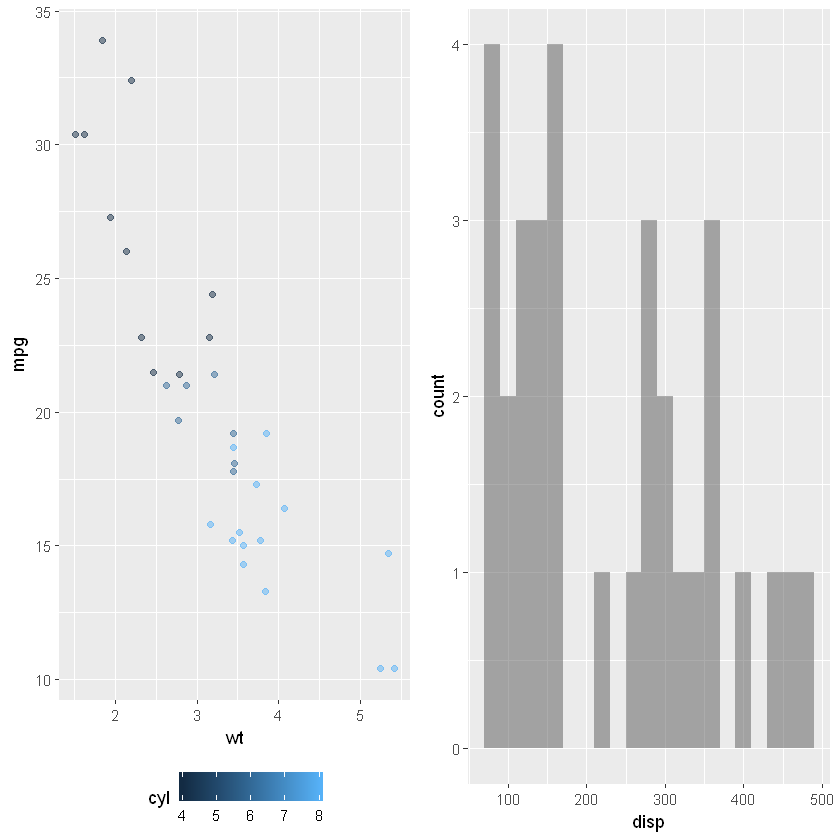

In [11]:
# Add a theme (legend at the bottom)
g1 <- ggplot(mtcars, aes(wt, mpg, col = cyl)) +
  geom_point(alpha = 0.5) +
  theme(legend.position = "bottom")

# Add a theme (no legend)
g2 <- ggplot(mtcars, aes(disp, fill = cyl)) +
  geom_histogram(position = "identity", alpha = 0.5, binwidth = 20) +
  theme(legend.position = "none")

# Load gridExtra
library(gridExtra)

# Call grid.arrange()
grid.arrange(g1, g2, ncol = 2)

Eventually you want to isolate the legend and have it appear as the image in the viewer, so you can let ggplot arrange it in a horizontal layout for us.

Arranging plots (2)
100xp
In the previous exercise you did a bare-bones arrangement of plots, but it would be nicer if the plot looks like the one that's shown in the viewer. You can imagine that you have three panels, not two. There are two asymmetrical rows, the small second row is where the legend is, and two symmetrical columns, where the plots are.

To obtain this plot you need to extract the legend. You already saw this in previous exercises and it has already been done for you; the legend is available as my_legend. Next you need to arrange all the items appropriately.

Instructions
Create an updated version of g1, called g1_noleg, where the legend has been removed. Do that by adding theme(legend.position = "none") to g1.
To make a good looking layout, you have to know the height of the legend. This information is in the heights element of my_legend. Take the sum() of these heights and assign them to the object legend_height.
Arrange everything inside grid.arrange():
The first three arguments are g1_noleg, g2 and my_legend.
Because the layout is more exotic now, you have to define a layout_matrix; this is a matrix with values representing the plot number and the space in the layout that the plot will occupy. The matrix you thus need is matrix is matrix(c(1, 3, 2, 3), ncol = 2).
To adjust the height of each segment in your layout matrix, you have to set the heights argument. For this, use unit.c(unit(1, "npc") - legend_height, legend_height). The second row takes up legend_height, the first row takes up 1 - legend_height, in units relative to the plotting device ("npc"). unit.c() is a special version of the standard c() function.

In [ ]:
# ggplot2, grid and gridExtra have been loaded for you
# Definitions of g1 and g2
g1 <- ggplot(mtcars, aes(wt, mpg, col = cyl)) +
  geom_point() +
  theme(legend.position = "bottom")

g2 <- ggplot(mtcars, aes(disp, fill = cyl)) +
  geom_histogram(binwidth = 20) +
  theme(legend.position = "none")

# Extract the legend from g1
my_legend <- ggplotGrob(g1)$grobs[[legend_index]]  

# Create g1_noleg
g1_noleg <- g1 + 
    theme(legend.position = "none")

# Calculate the height: legend_height
legend_height <- sum(my_legend$heights)

# Arrange g1_noleg, g2 and my_legend
grid.arrange(g1_noleg, g2, my_legend,
             layout_matrix = matrix(c(1, 3, 2, 3), ncol = 2),
             heights = unit.c(unit(1, "npc") - legend_height, legend_height))


If ggplot2 doesn't provide enough customization possibilities, there's always gridExtra!

# 5. Data Munging and Visualization Case Study

In this chapter, you'll draw on some of the many tools for effective data visualization that we've covered over the three ggplot2 courses and combine them with some data munging techniques.

In [ ]:
Base package bag plot
100xp

Before you create your own stats layer, you'll begin by understanding what a bag plot is, and how to get the data for your own plots.

For this you'll use a fake dataset called test_data, which only contains two variables. A scatter plot is shown in the viewer.

The aplpack package, which contains the bagplot() and compute.bagplot() functions, has been loaded for you.
Instructions

    Create a bag plot of test_data data frame with the bagplot() function. The data frame only has two columns, so you won't need to specify the x and y arguments.
    Call compute.bagplot() on test_data to obtain a named list of all the statistics used to build the bag plot and assign the results to an object called bag.
    Code to print the hull loop and hull bag are included; add code to print out the outliers (pxy.outlier)
    Code to add point layers to highlight two of the three aforementioned components in different colors is available. Add another points() function to show the outliers in purple.


In [ ]:
# Call bagplot() on test_data
bagplot(test_data)

# Call compute.bagplot on test_data, assign to bag
bag <- compute.bagplot(test_data)

# Display information
bag$hull.loop
bag$hull.bag
bag$pxy.outlier

# Highlight components
points(bag$hull.loop, col = "green", pch = 16)
points(bag$hull.bag, col = "orange", pch = 16)
points(bag$pxy.outlier, col = "purple", pch = 16)

In [ ]:
Bag plots are a great visualisation option, but not common, so use with caution! 

### Multilayer ggplot2 bag plot
100xp

The viewer shows the plot you created in the last exercise.

With our current understanding, if we wanted to make a bag plot in ggplot2, we'd take the three data frames (for the loop, bag and outliers) and add them using three separate geom layers.

Let's see how this simple solution works and in the next exercises you'll expand on this topic to make a real stats layer.

The bag and test_data objects from the previous exercise are provided. test_data contains two variables: x and y.
Instructions

 -  The code to convert the hull loop and hull bag matrices into data frames are included. Do a similar thing for the outliers, you saw where this is stored in the last exercise.
 -  Finish the ggplot() command:
 -  Use test_data as the 'basic data layer', and map x onto x and y onto y.
 -  The geom_polygon() calls for hull.loop and hull.bag are included. Since you have a consistent naming, these layers can inherit from the original aesthetics.
 -  Complete the last command to add a geom_point() layer for pxy.outlier. It will produce filled purple points.


In [ ]:
# bag and test_data are available

# Create data frames from matrices
hull.loop <- data.frame(x = bag$hull.loop[,1], y = bag$hull.loop[,2])
hull.bag <- data.frame(x = bag$hull.bag[,1], y = bag$hull.bag[,2])
pxy.outlier <- data.frame(x = bag$pxy.outlier[,1], y = bag$pxy.outlier[,2])

# Finish the ggplot command
ggplot(test_data, aes(x = x,  y = y)) +
  geom_polygon(data = hull.loop, fill = "green") +
  geom_polygon(data = hull.bag, fill = "orange") +
  geom_point(data = pxy.outlier, col = "purple", pch = 16, cex = 1.5)

In [ ]:
Creating ggproto functions
100xp

Now that you know where to find the statistics and how to use them in ggplot2, let's put them into the functions that will make them easier to use.

For this you'll use the ggproto object-oriented programming system - the basis of creating a new layer in ggplot2. There are four arguments for a ggproto object. The first two arguments are its name and what it inherits from (in this case Stat). Next come the required aesthetics, and then, most importantly, what the stat should do. For each group of data it receives from the data layer, what should be computed? This will simply be the calculations you performed in the previous exercise.

The ggproto object definition of StatLoop is already provided. Can you finish the implementations for the other ones?
Instructions

Inspired by the implementation of StatLoop, create ggproto object definitions of StatBag and StatOut. For the former, you'll need the hull.bag element of bag, for the latter you'll need the pxy.outlier element. We saw these already in the previous exercises.

Watch out: you have to use generic names now: use data$x instead of test_data$x!

In [ ]:
# ggproto for StatLoop (hull.loop)
StatLoop <- ggproto("StatLoop", Stat,
                    required_aes = c("x", "y"),
                    compute_group = function(data, scales) {
                      bag <- compute.bagplot(x = data$x, y = data$y)
                      data.frame(x = bag$hull.loop[,1], y = bag$hull.loop[,2])
                    })

# ggproto for StatBag (hull.bag)
StatBag <- ggproto("StatBag", Stat,
                   required_aes = c("x", "y"),
                   compute_group = function(data, scales) {
                     bag <- compute.bagplot(x = data$x, y = data$y)
                     data.frame(x = bag$hull.bag[,1], y = bag$hull.bag[,2])
                   })

# ggproto for StatOut (pxy.outlier)
StatOut <- ggproto("StatOut", Stat,
                   required_aes = c("x", "y"),
                   compute_group = function(data, scales) {
                     bag <- compute.bagplot(x = data$x, y = data$y)
                     data.frame(x = bag$pxy.outlier[,1], y = bag$pxy.outlier[,2])
                   })

### Creating stat_bag()
100xp

In the previous exercise you established three ggproto objects, now you need to combine them under a new ggplot2 function that you'll call stat_bag().

Adding a stat_bag() layer will execute each of the three ggproto objects that you just created.

Your three objects are called StatLoop, StatBag, StatOut, so you'll need three layers in your stat_bag() function, which you'll make with the layer() function. When you have multiple layers, you can combine them in a list by simply calling list().

For each layer, you'll also need to specify the approrpiate geom: "polygon" or "point".

The framework for the stat_bag() layer function has been provided for you.
Instructions

  -  Set the default geom of stat_bag to "polygon", since that will be used in two of the layers.
  -  For each of the three layers, fill in the appropriate ggproto object, that you've created in the previous exercise: StatLoop, StatBag & StatLoop.
  -  For each of the three layers, the geom is specified. For the first two layers, it's the default (geom = geom), for the outliers, it's geom = "point".
  -  Add some more default visial attributes for the first two layers: set alpha = 0.35 and col = NA.


In [ ]:
# StatLoop, StatBag and StatOut are available

# Combine ggproto objects in layers to build stat_bag()
stat_bag <- function(mapping = NULL, data = NULL, geom = "polygon",
                     position = "identity", na.rm = FALSE, show.legend = NA,
                     inherit.aes = TRUE, loop = FALSE, ...) {
  list(
    # StatLoop layer
    layer(
      stat = StatLoop, data = data, mapping = mapping, geom = geom, 
      position = position, show.legend = show.legend, inherit.aes = inherit.aes,
      params = list(na.rm = na.rm, alpha = 0.35 , col = NA, ...)
    ),
    # StatBag layer
    layer(
      stat = StatBag, data = data, mapping = mapping, geom = geom, 
      position = position, show.legend = show.legend, inherit.aes = inherit.aes,
      params = list(na.rm = na.rm, alpha = 0.35 ,col = NA, ...)
    ),
    # StatOut layer
    layer(
      stat = StatOut, data = data, mapping = mapping, geom = "point", 
      position = position, show.legend = show.legend, inherit.aes = inherit.aes,
      params = list(na.rm = na.rm, alpha = 0.7, col = NA, shape = 21, ...)
    )
  )
}

Use stat_bag()
100xp

So far you've seen the basics for creating a new ggplot layer. It's bare-bones, but functional. You now have a working solution to the bag plot question.

The ggplot2 command that you've coded before is available. now, let's use stat_bag() to make our plot!
Instructions

  -  Add a ggplot from scratch:
  -  Start with the data layer: test_data; map x onto x and y onto y.
  -  Add stat_bag() to the basic layers, and therein set fill = "black".
  -  Using stat_bag() is much more efficient, but is it more flexible? Yes! Create a similar plot, but this time on test_data2. This dataset contains a variable called treatment that specifies group membership.
  -  Start with the data layer: test_data2. Again map x and y, but also set fill = treatment.
  -  Simply add stat_bag() again.


In [ ]:
# hull.loop, hull.bag and pxy.outlier are available
# stat_bag, test_data and test_data2 are available

# Previous method
ggplot(test_data, aes(x = x,  y = y)) +
  geom_polygon(data = hull.loop, fill = "green") +
  geom_polygon(data = hull.bag, fill = "orange") +
  geom_point(data = pxy.outlier, col = "purple", pch = 16, cex = 1.5)

# stat_bag
ggplot(test_data, aes(x = x, y = y)) +
  stat_bag(fill = 'black')

# stat_bag on test_data2
ggplot(test_data2, aes(x = x, y = y, fill = treatment)) +
  stat_bag()


## Case Study II - Weather (Part 1) - Video

In [ ]:
Step 1: Read in data and examine
100xp

Before you can begin with your visualization you need to obtain and clean up the data. The data you're using comes from the University of Dayton.

In this exercise you'll read in our data and clean it up. To start, you'll focus on the weather data from New York. It is available as a fixed-width format file called NYNEWYOR.txt.

Since leap years mean that dates don't line up perfectly, you're just going to remove all occurrences of February 29.

In addition, you're going to split your data in two pieces: one for the historical record, and one for 2016. You'll see how to avoid doing this later on.
Instructions

    Finish the read.fwf() (for fixed-width format files) call to read in the data. Next to the URL and the col.names, you have to specify the header (the first row does NOT contain variable names, so this is FALSE) and widths = c(14, 14, 13, 4), to specify the number of characters of each column.
    Check out the structure of weather. Note, for example, that months are numbers, not names.
    Use dplyr functionality to create past:
    Use filter() on the month and day columns to remove all observations matching February 29th.
    Use filter() again on the year column to remove all observations from the most recent year.
    Finish off by inspecting the struture of past as well.


In [ ]:
# Import weather data
weather <- read.fwf("NYNEWYOR.txt",
                    header = FALSE,
                    col.names = c("month", "day", "year", "temp"),
                    widths = c(14, 14, 13, 4))

# Check structure of weather
str(weather)

# Create past with two filter() calls
past <- weather %>%
  filter(!(month == 2 & day == 29)) %>%
  filter(year != max(year))
  
# Check structure of past
str(past)

We could already think about making our script more dynamic by using lubridate::year(Sys.Date()) to extract the current year, but since our dataset ends in 2016, we can just take the max value in the year column. 

In [ ]:
Step 2: Summarize history
100xp

Using the past data frame, you'll calculate the 95% CI for the temperatures on each date. To do this, you'll assign a unique ID, called yearday to each date. This way, you can group according to yearday, then calculate aggregrate statistics on the correct values, over all years. You could group according to month and year, but yearday will make plotting on the x axis easier later on.

The past data frame that you've created before is already available in your workspace.

Note: You'll use a bunch of dplyr calls here; if you want to refresh your memory on them, you can have a look at our course on dplyr.
Instructions

Chain a bunch of dplyr calls with %>% to create a new version of past called past_summ:

    Use group_by() to group the data according to year.
    Use mutate() to add a column called yearday with the values 1:length(day).
    Ungroup the data again with ungroup().
    Missing temperature values have a temp value equal to -99. Use filter() to remove those.
    Use group_by() again, this time to group according to yearday
    Use mutate() to create 5 grouped metrics based on temp:
    max, calculated as max(temp).
    min, with min().
    avg, with mean().
    CI_lower, calculated as Hmisc::smean.cl.normal(temp)[2].
    CI_upper, calculated similarly, but taking the third element of the result of the Hmisc function.
    Finally, ungroup the data again with ungroup().


In [ ]:
# Create new version of past
past_summ <- past %>%
  group_by(year) %>%
  mutate(yearday=1:length(day)) %>%
  ungroup() %>%
  filter(temp!=-99) %>%
  group_by(yearday) %>%
  mutate(max = max(temp),
         min = min(temp),
         avg = mean(temp),
         CI_lower = Hmisc::smean.cl.normal(temp)[2],
         CI_upper = Hmisc::smean.cl.normal(temp)[3]) %>%
  ungroup()

# Structure of past_summ
str(past_summ)

In [ ]:
Step 3: Plot history
100xp

Now you're ready to plot the historical record. There are couple things you can do here. The typical thing, but also pretty boring, would be to plot the average as a solid line:

ggplot(past, aes(x = yearday, y = avg)) +
  geom_line()

You can do better than that by plotting a line range for the historical min-max and also the 95% CI. Very coincidentally, that's exactly the data that you've prepared in the previous exercise! The ggplot() command in the editor is a first attempt.

However, since the range of values at the extremes is so sparse, it would be more accurate to represent this using points. Can you update the plot accordingly?
Instructions

    The range of values at the extremes is so sparse that it would be more accurate to represent this using points. Update the geom_linerange() layer for min and max to use geom_point() instead. Think about whether you have to keep, update or remove the aesthetic mappings here.
    Inside geom_point(), set col = "#EED8AE", alpha = 0.3 and shape = 16.


In [ ]:
# Adapt historical plot
ggplot(past, aes(x = yearday, y = temp)) + 
  geom_point(col = "#EED8AE", alpha = 0.3, shape = 16) +
  geom_linerange(aes(ymin = CI_lower, ymax = CI_upper), col = "#8B7E66")

In [ ]:
Step 4: Plot present
100xp

Now that you have an idea of the historical record, you'll want to compare it to the temperature measurements of the current year. dplyr code similar to the one you've coded up to create the past data frame has been provided. Up to you to add another layer to the ggplot() command from the previous exercise!
Instructions

Add a geom_line() layer to the ggplot() command from the previous exercise:

    You're dealing with a new dataset here, so make sure to specify data = present inside geom_line.
    Do you have to specify any other aesthetics?


In [ ]:
# weather and past are available in your workspace

# Create present
present <- weather %>%
  filter(!(month == 2 & day == 29)) %>%
  filter(year == max(year)) %>%
  group_by(year) %>%
  mutate(yearday = 1:length(day)) %>%
  ungroup() %>%
  filter(temp != -99)

# Add geom_line to ggplot command
ggplot(past, aes(x = yearday, y = temp)) + 
  geom_point(col = "#EED8AE", alpha = 0.3, shape = 16) +
  geom_linerange(aes(ymin = CI_lower, ymax = CI_upper), col = "#8B7E66") + 
  geom_line(data=present, aes(group=1))

In [ ]:
Step 5: Find new record highs
100xp

You're going to look at a couple ways of detecting interesting features in your dataset. In this case, the interesting features are going to be which dates in the current year exceed the historical record (either a new record high or low for each yearday).

The first method, which you'll use here and in the next exercise, works fine, but you'll explore how to make it more efficient in later exercises.
Instructions

    Starting from past, create past_highs:
    Use group_by() to group by yearday
    Use summarise() to create a new variable, past_high, equal to max(temp).
    Finish the second dplyr call to create the record_high data frame:
    Use left_join(past_highs) to join present with past_highs.
    Use filter() to only keep the observations for which temp is larger than past_high.
    Use record_high to add yet another layer to the plot from before. Use geom_point(), and use col = "#CD2626". Add aesthetic mappings with aes() if you think is required.


In [ ]:
# Create past_highs
past_highs <- past %>%
  group_by(yearday) %>%
  summarise(past_high = max(temp))

# Create record_high
record_high <- present %>%
  left_join(past_highs) %>%
  filter(temp > past_high)

# Add record_high information to plot
ggplot(past, aes(x = yearday, y = temp)) + 
  geom_point(col = "#EED8AE", alpha = 0.3, shape = 16) +
  geom_linerange(aes(ymin = CI_lower, ymax = CI_upper), col = "#8B7E66") +
  geom_line(data = present) +
  geom_point(data = record_high, col = "#CD2626")


### Step 6: Efficiently calculate record highs and lows
100xp

To also add the record lows to the plot, you could do the same things as in the previous exercise: create a data frame past_lows, join it with present, figure out the record lows, and add yet another layer, with a blueish color.

This is not really the ggplot2 way to do things. Instead of adding two layers, and manually assigning a color, you can do something else: you can map a variable denoting a record high or low onto the color aesthetic!

Here you'll combine the previous two exercises to identify the record highs and lows in one step, assign them to a new data frame called extremes, and use this to map a color aesthetic. This will make both your data munging and plotting code more efficient.
Instructions

  -  The dplyr command that creates past_extremes is already included.
  -  Finish the second dplyr command to create record_high_low:
  -  Instead of simply filtering out record highs or lows, use mutate() to create a new variable record.
  -  The value of record should be "#0000CD" if temp < past_low.
  -  The value of record should be "#CD2626" if temp > past_high.
  -  Otherwise, record should be "#00000000" (transparant!). Fill these values in the the two ifelse statements.
  -  Add a geom_point() to the ggplot() command:
  -  Use record_high_low as dataset, and make sure to map record onto the col aesthetic.
  -  To get the proper colors we need to use a scale_color_identity() layer as well. This takes the colour value from the actual value in the data frame (see above).


In [ ]:
# Create past_extremes
past_extremes <- past %>%
  group_by(yearday) %>%
  summarise(past_low = min(temp),
            past_high = max(temp))

# Create record_high_low
record_high_low <- present %>%
  left_join(past_extremes) %>%
  mutate(record = ifelse(temp < past_low, 
                         "#0000CD",
                         ifelse(temp > past_high, 
                                "#CD2626", 
                                "#00000000")))

# Structure of record_high_low
str(record_high_low)

# Add point layer of record_high_low
ggplot(past, aes(x = yearday, y = temp)) + 
  geom_point(col = "#EED8AE", alpha = 0.3, shape = 16) +
  geom_linerange(aes(ymin = CI_lower, ymax = CI_upper), col = "#8B7E66") +
  geom_line(data = present) +
  geom_point(data = record_high_low, aes(col = record)) +
  scale_color_identity()



### Step 7: Custom legend
100xp

Although you have a lot of information on your plot, the only aesthetic that you used was color, so the legend won't reflect all geoms and color attributes that you've used.

This means you'll have to create your own legend. You'll do this with the grid package plotting functions that you can call after generating the ggplot itself.

We've set up a new function, draw_pop_legend(), that takes 5 arguments. Your task it to complete the rest. The function will push a viewport using pushViewport(viewport()). Code to position the points, rectangle and black line has been provided for you. You should be able to understand what's happening here from the previous chapter on grid graphics. Feel free to play around with the arguments, but the defaults should work fine.
Instructions

   - Set the x, y, width, and height arguments of viewport() function with the arguments from the draw_pop_legend() function definition (that is, x, not 0.6).
   - legend_labels and legend_position (y positions) have already been set for you. Add them, along with fontsize to grid.text().
   - Call popViewport() at the end of the function to restore the active viewport.
   - The plotting object from the previous exercise is available as p in your workspace. Print p to the viewer.
   - Now call draw_pop_legend() to add a legend.


In [ ]:
# Finish the function draw_pop_legend
draw_pop_legend <- function(x = 0.6, y = 0.2, width = 0.2, height = 0.2, fontsize = 10) {
  
  # Finish viewport() function
  pushViewport(viewport(x = x, y = y, width = width, height = height, just = "center"))

  legend_labels <- c("Past record high",
                     "95% CI range",
                     "Current year",
                     "Past years",
                     "Past record low")

  legend_position <- c(0.9, 0.7, 0.5, 0.2, 0.1)
  
  # Finish grid.text() function
  grid.text(label = legend_labels, x = 0.12, y = legend_position, 
            just = "left", 
            gp = gpar(fontsize = fontsize, col = "grey20"))
  
  # Position dots, rectangle and line
  point_position_y <- c(0.1, 0.2, 0.9)
  point_position_x <- rep(0.06, length(point_position_y))
  grid.points(x = point_position_x, y = point_position_y, pch = 16,
              gp = gpar(col = c("#0000CD", "#EED8AE", "#CD2626")))
  grid.rect(x = 0.06, y = 0.5, width = 0.06, height = 0.4,
            gp = gpar(col = NA, fill = "#8B7E66"))
  grid.lines(x = c(0.03, 0.09), y = c(0.5, 0.5),
             gp = gpar(col = "black", lwd = 3))
  
  # Add popViewport() for bookkeeping
  popViewport()
}

# Plotting object p, from previous exercise
p

# Call draw_pop_legend()
draw_pop_legend()

There are a couple other ways you could have done this. You could have used ggplot2::annotate(), which is rather tedious and not as reproducible. You could have also used a layout when making the viewport, filling each segment in the viewport layout with specific elements. You could have also named each viewport so as to access the graphics objects, grobs, later on. Here, you're also neglecting checks and error messages which would ensure your function always works properly - so it's not quite ready for release into the wild. For our purposes, this working version will suffice, but in a package you'd probably want something more robust. 

## Case Study II - Weather (Part 2) - Video

In [ ]:
Step 1: clean_weather()
100xp

Now that you've created a unique visualization to answer a specific data analysis question, it would be nice if we can make our lives even easier. Having to continually run all the code you created previously to make your plot is a big hassle! What if you wanted to do this for many different cities?

Instead of trying to combine all steps into a single function, which is what you did with the mosaic plot at the end of course 2, you'll make several stat functions which will act as layers in ggplot2 plots. This will help you to make flexible plots in the future.

Let's start by making a quick and dirty function to read in and clean up the data.
Instructions

    Finish the clean_weather() function:
    Complete the read.fwf command. The first argument is file, the only argument that's passed into the function. Make sure to specify that the first line in the file does not contain the dataset's variable names.
    Complete the dplyr command: remove observations for the 29th of February, and filter out observations with missing temperatures, that have a temp value of -99.
    After defining clean_weather(), call it on "NYNEWYOR.txt"and assign the data frame to my_data.


In [ ]:
# Finish the clean_weather function
clean_weather <- function(file) {
  weather <- read.fwf(file,
                      header = FALSE,
                      col.names = c("month", "day", "year", "temp"),
                      widths = c(14, 14, 13, 4))
  weather %>%
   filter(!(month == 2 & day == 29)) %>%
    group_by(year) %>%
    mutate(yearday = 1:length(day)) %>%
    ungroup() %>%
    filter(temp!=-99)
}

# Import NYNEWYOR.txt: my_data
my_data <- clean_weather("NYNEWYOR.txt")

In [ ]:
From now on, getting clean weather data will be as easy as calling clean_weather()! 

In [ ]:
Step 2: Historical data
100xp

Let's develop the first layer to show the historical data called stat_historical(). Like before, you'll create a stats layer starts by creating a stats object with ggproto(), and then you'll create a function where you'll define a number of layers.

To do this properly, you are going to define a new aesthetic inside ggproto(). This will be called "year", and you can map the variable year from your dataset onto this aesthetic. You'll see in a bit that this a very elegant solution.
Instructions

    Finish the definition of StatHistorical:
    The first argument of ggproto() is the 'class name'; set it to "StatHistorical".
    The compute_group() function takes three arguments: data, scales and params
    The required aesthetics are "x", "y" and "year".
    Inside the definition stat_historical:
    Set the default geom to "point" in the function definition.
    Have the first layer inherit this default geom: geom = geom
    Make the default geom for the second layer: geom = "linerange".
    In the second layer, use the stat StatHistorical, that you've just defined - quotes are not necessary here!
    Now that you've defined stat_historical(), use it!
    Finish the base layer: map yearday onto x, temp onto y and year onto year.
    Add stat_historical() with default arguments.


In [ ]:
# Create the stats object
StatHistorical <- ggproto("StatHistorical", Stat,
                    compute_group = function(data, scales , params) {
                      data <- data %>%
                        filter(year != max(year)) %>%
                        group_by(x) %>%
                        mutate(ymin = Hmisc::smean.cl.normal(y)[3],
                               ymax = Hmisc::smean.cl.normal(y)[2]) %>%
                        ungroup()
                    },
                    required_aes = c("x", "y" , "year"))

# Create the layer
stat_historical <- function(mapping = NULL, data = NULL, geom = "point",
                            position = "identity", na.rm = FALSE, show.legend = NA, 
                            inherit.aes = TRUE, ...) {
  list(
    layer(
      stat = "identity", data = data, mapping = mapping, geom = geom,
      position = position, show.legend = show.legend, inherit.aes = inherit.aes,
      params = list(na.rm = na.rm, col = "#EED8AE", alpha = 0.3, shape = 16, ...)
    ),
    layer(
      stat = StatHistorical, data = data, mapping = mapping, geom = "linerange",
      position = position, show.legend = show.legend, inherit.aes = inherit.aes,
      params = list(na.rm = na.rm, col = "#8B7E66", ...)
    )
  )
}

# Build the plot
my_data <- clean_weather("NYNEWYOR.txt")
ggplot(my_data, aes(x = yearday, y = temp, year = year)) +
  stat_historical()

In [ ]:
Step 3: Present data
100xp

Nice. Now you have the historic record. What about getting the current year? This is really straight-forward! You just need to do the same trick of defining a new "year" aesthetic and then filter the dataset accordingly. This time you only need one layer, there's no notion of a line range geom in this case!
Instructions

    Finish the definition of StatPresent:
    The first argument of ggproto() is the 'class name'; set it to "StatPresent".
    Inside compute_group(), transform data so that it only contains the observations of the last year (max(year)).
    The required aesthetics are c("x", "y", "year").
    Inside the definition stat_present:
    Set the default geom to "line" and have the layer inherit this default: geom = geom.
    Inside the layer, use the stat StatPresent (no "").
    Add stat_present() to the ggplot() command that you've coded in the previous exercise.


In [ ]:
# Create the stats object
StatPresent <- ggproto("StatPresent", Stat,
                       compute_group = function(data, scales, params) {
                         data <- filter(data, year == max(year))
                       },
                       required_aes = c("x", "y", "year"))

# Create the layer
stat_present <- function(mapping = NULL, data = NULL, geom = "line",
                       position = "identity", na.rm = FALSE, show.legend = NA, 
                       inherit.aes = TRUE, ...) {
  layer(
    stat = StatPresent, data = data, mapping = mapping, geom = geom,
    position = position, show.legend = show.legend, inherit.aes = inherit.aes,
    params = list(na.rm = na.rm, ...)
  )
}

# Build the plot
my_data <- clean_weather("NYNEWYOR.txt")
ggplot(my_data, aes(x = yearday, y = temp, year = year)) +
  stat_historical() +
  stat_present()

In [ ]:
Step 4: Extremes
100xp

The last step is to create a stat_extreme() layer. This takes advantage of the calculations you did earlier, which combined the definitions of new highs and lows into one variable, record. This variable contains the colors of the dots: deep blue for record lows, dark red for record highs, and transparent dots otherwise. Because this record variable is 'internally computed', you'll have to refer to it as ..record.. when you're creating the plot.
Instructions

    Finish the definition of StatExtremes:
    The first argument of ggproto() is the 'class name'; set it to "StatExtremes".
    present, past, and past_extremes are already created inside compute_group().
    Transform the data object: Fill in "#0000CD", "#CD2626" and "#00000000" at the appropriate locations.
    Inside the definition stat_extremes:
    Set the default geom to "point" and have the layer inherit this default: geom = geom.
    Inside the layer, use the stat StatExtremes (no "").
    Add stat_extremes() to the ggplot() command that you've coded in the previous exercise:
    Use aes(col = ..record..) to map the records onto the col aesthetic.
    Also add scale_color_identity() to take the col values literally.


In [ ]:
# Create the stats object
StatExtremes <- ggproto("StatExtremes", Stat,
                        compute_group = function(data, scales, params) {
                          
                          present <- data %>%
                            filter(year == max(year)) 
                          
                          past <- data %>%
                            filter(year != max(year)) 
                          
                          past_extremes <- past %>%
                            group_by(x) %>%
                            summarise(past_low = min(y),
                                      past_high = max(y))
                          
                          # transform data to contain extremes
                          data <- present %>%
                            left_join(past_extremes) %>%
                            mutate(record = ifelse(y < past_low, 
                                                   "#0000CD", 
                                                   ifelse(y > past_high, 
                                                          "#CD2626", 
                                                          "#00000000")))
                        },
                        required_aes = c("x", "y", "year"))

# Create the layer
stat_extremes <- function(mapping = NULL, data = NULL, geom = "point",
                          position = "identity", na.rm = FALSE, show.legend = NA, 
                          inherit.aes = TRUE, ...) {
  layer(
    stat = StatExtremes, data = data, mapping = mapping, geom = geom,
    position = position, show.legend = show.legend, inherit.aes = inherit.aes,
    params = list(na.rm = na.rm, ...)
  )
}

# Build the plot
my_data <- clean_weather("NYNEWYOR.txt")
ggplot(my_data, aes(x = yearday, y = temp, year = year)) +
  stat_historical() +
  stat_present() +
  stat_extremes(aes(col =  ..record..)) +
  scale_color_identity() # Colour specification

In [ ]:
Step 5: Re-use plotting style
100xp

You're at the end of your case study: you have built up three stat_ functions that you can use in any combination you like and with any dataset that fits the type of stats you are doing. Let's try it out on some other cities! In your working directory, there are four files, related to the weather data for New York, Paris, Reykavik and London. Their filenames are stored in the my_files vector.
Instructions

    Finish the for loop to make one huge dataset:

    Call clean_weather() on file. For each cycle of the for loop file will be the name of one of our four files.

    Assign the output to the object temp.

    We need to know where the data came from. So add an id column to temp and populate it with the result of a sub() function that substitutes ".txt" with "" (nothing) in file (that is, the name of the file). This way, we just get the city name, and not the file extension. Vector recycling will take care of repeating this for the length of the temp data frame.

    The rbind call to past together all data in my_data is already provided.

    Build the final plot:

    Set the data layer (my_data) and the aesthetic mappings.

    Use stat_historical(), stat_present() and stat_extremes(). Make sure to map ..record.. onto col in the appropriate stats layer.

    Don't forget scale_color_identity().

    Finish off by adding facet_wrap(~id, ncol = 2) to have a separate plot per id.


In [ ]:
# File paths of all datasets
my_files <- c("NYNEWYOR.txt","FRPARIS.txt", "ILREYKJV.txt", "UKLONDON.txt")

# Build my_data with a for loop
my_data <- NULL
for (file in my_files) {
  temp <- clean_weather(file)
  temp$id <- sub(".txt", "", file)
  my_data <- rbind(my_data, temp)
}

# Build the final plot, from scratch!
ggplot(my_data, aes(x = yearday, y = temp, year = year)) +
  stat_historical() +
  stat_present() +
  stat_extremes(aes(col = ..record..)) +
  scale_color_identity() +  # specify colour here
  facet_wrap(~id, ncol = 2)

In [ ]:
You've completed all three ggplot2 courses. Grab yourself a DRY martini and head over to the final video! 

# Thank You